<a href="https://colab.research.google.com/github/C-Fer/Data-Cleaning-and-Sorting/blob/main/IA_SegundoParcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parcial Segundo Corte**
## Inteligencia Artificial

### Integrantes:

*   Camilo Fernández - T00054759
*   Edgar Hernández - T00054326    
*   René de Oro - T00054355



## **1. Librerias necesarias**


In [ ]:
#Gestión de datos
import os
import pandas as pd
import numpy as np
%matplotlib inline
import datetime

#Gráficas
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import Image
import missingno as msno
import seaborn as sns

#Modelos
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


## **2. Carga de datos al dataframe**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = os.path.join(os.getcwd(), "/content/drive/MyDrive/Colab Notebooks/Parcial2_IA/data.csv")
dataframe = pd.read_csv(data, encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,143,144,145,146,154,155,156,157,158,159,161,162,163,174) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## **3. Análisis de los datos**

### Cabecera del dataframe

In [ ]:
dataframe.head()

,Registro,Paciente,Edad,RSSS,Estrato,EstadoCivil,Cefalea,Epistaxis,DisneaME,Disuria,Lipotimia,Palpitaciones,DisneaGE,Edemas,Vertigo,Precordialgia,Polidipsia,Claudicacion,Tinitus,Ortopnea,Polifagia,LesionEnPies,SintomasVisuales,DisneaPxNoc,Poliuria,DolorNeuritico,Sudoracion,DisneaPE,Hematuria,HTA1,HTAEmbarazo,Retinopatia,FumaMenos10,ECVICT,DM1DM2,EPOC,FumaDe10A20,IAM1,DMGestacional,TB,...,"Autoestima, autocuidado",1_indicaciones_sobre_sus_factores_riesgo_predisponente,2_indicaciones_control_medicina_general_5_años,3_intervenciones_sobre_factore_riesgo_específico,4_citologia_cervico_uterina,Riesgo_edad,Antecedentes_familiares,Perimetro_abdominal,Riesgo_perimetro,Tabaquismo,Displidemia_(cualquiera),HTA_ya_diagnosticada,Total_Riegos(F_de_R),Enfermedad_renal,Nefropatia_diabetica,Creatinina,Enfermedad_arterial_periferica,Retinopatia _avanzada,LOB,EKG,Ecocardiografia,Ateroesclerosis,Ecografia_carotida,Disfuncion_renal,Micro_albuminuria,Condiciones_clinicas_asociadas,Diabetes_mellitus_diagnosticada,Glicemia_ayunas,Glicemia_postprandial,Diabetes_mellitus_(DM2),PAS-PAD_T1,PAS-PAD_T2,PAS-PAD_P,ClasificacionFinalRiesgoCardiovascular,FinalidadConsulta,CausaExterna,TipoDiagnostico,CodigoDiagnosticoPrincipal,DiagnosticoPrincipal,Resultado
0,371520,102669,43,Subsidiado,1,Union libre,No,No,No,No,No,Si,Si,Si,No,No,No,No,No,No,No,No,No,No,No,Si,No,No,No,Si,Si,No,No,No,No,No,No,No,No,No,...,True,True,True,True,True,False,False,85.0,False,False,False,True,1.0,Si,No,NaN,No,Si,No,False,False,False,False,False,False,No,False,False,False,No,120/80,120/80,120/80,Riesgo bajo,10,15,3,I10X,HIPERTENSION ESENCIAL (PRIMARIA),True
1,376887,103957,46,Subsidiado,1,Union libre,Si,No,No,No,No,Si,No,No,Si,No,No,No,No,No,No,No,No,No,No,Si,No,No,No,Si,No,No,No,No,No,No,No,No,No,No,...,True,True,True,True,False,False,False,95.0,True,False,False,True,2.0,Si,No,NaN,No,Si,No,False,False,False,False,False,False,NaN,False,False,False,No,110/80,110/80,110/80,NaN,10,15,2,I10X,HIPERTENSION ESENCIAL (PRIMARIA),True
2,367522,104149,68,Subsidiado,1,Union libre,Si,No,No,No,No,Si,Si,No,Si,Si,No,No,No,No,No,No,Si,No,No,Si,No,No,No,Si,No,No,No,No,Si,No,No,No,No,No,...,True,True,True,True,False,True,False,112.0,True,False,True,True,4.0,Si,No,NaN,No,Si,No,False,False,False,False,False,False,No,True,False,False,Si,130/80,130/80,130/80,NaN,10,15,2,I10X,HIPERTENSION ESENCIAL (PRIMARIA),True
3,376208,106031,53,No afiliado,1,Union libre,Si,Si,No,No,No,Si,Si,No,No,No,No,No,No,No,No,No,Si,No,No,Si,No,No,No,Si,No,No,No,No,No,No,No,No,No,No,...,True,True,True,True,False,False,False,88.0,True,False,False,True,2.0,Si,No,NaN,No,Si,No,False,False,False,False,False,False,No,False,False,False,No,120/80,120/80,120/80,NaN,10,15,2,I10X,HIPERTENSION ESENCIAL (PRIMARIA),True
4,375671,109902,88,Subsidiado,1,Union libre,Si,No,Si,No,No,Si,Si,Si,Si,Si,No,No,No,No,No,No,No,No,No,Si,No,No,No,Si,No,No,No,No,No,No,No,No,No,No,...,True,True,True,True,False,True,False,88.0,False,False,False,True,2.0,Si,No,NaN,No,Si,No,False,False,False,False,False,False,No,False,False,False,No,110/80,110/80,110/80,NaN,10,15,2,I10X,HIPERTENSION ESENCIAL (PRIMARIA),True


### Tamaño del dataframe

In [ ]:
dataframe.shape

(7454, 175)

### Scrubbing

#### **1. Tipos de datos de cada variable**

In [ ]:
## Información general de los datos y su tipo.
display(dataframe.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7454 entries, 0 to 7453
Data columns (total 175 columns):
 #   Column                                                  Dtype  
---  ------                                                  -----  
 0   Registro                                                int64  
 1   Paciente                                                int64  
 2   Edad                                                    int64  
 3   RSSS                                                    object 
 4   Estrato                                                 int64  
 5   EstadoCivil                                             object 
 6   Cefalea                                                 object 
 7   Epistaxis                                               object 
 8   DisneaME                                                object 
 9   Disuria                                                 object 
 10  Lipotimia                                               obj

None

#### **2. Disposición y Balance de datos**

Segmentación entre las variables categoricas vs. las variables continuas.

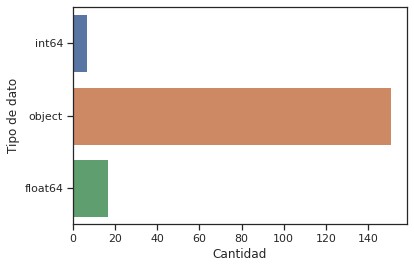

In [ ]:
## distribución y balance en el tipo de datos
sns.countplot(y=dataframe.dtypes.map(str))
plt.xlabel("Cantidad")
plt.ylabel("Tipo de dato")
plt.show()

In [ ]:
## Detalles estadisticos basicos
display(dataframe.describe())

,Registro,Paciente,Edad,Estrato,Peso,Talla,IMC,SMC,SignosVitales,FC,FR,Temperatura,Pulso,ResultLDL,ResultColestTotal,ResultHDL,ResultCreatinina,TrigliceridosResultado,Perimetro_abdominal,Total_Riegos(F_de_R),Creatinina,FinalidadConsulta,CausaExterna,TipoDiagnostico
count,7.454000e+03,7454.000000,7454.000000,7454.000000,6924.000000,6917.000000,6891.000000,6891.000000,6891.000000,6926.000000,6919.000000,6923.000000,6872.000000,3231.000000,3691.000000,2982.000000,3713.000000,3603.000000,5172.000000,7450.000000,131.000000,7454.000000,7454.000000,7454.000000
mean,8.901611e+05,43111.043735,66.644084,1.001744,67.924466,47.977665,19.953150,15.341071,15.341071,82.127057,21.383292,36.989817,84.293946,99.888579,178.703332,43.934608,1.019424,132.272773,90.932135,2.215973,0.941985,9.968607,14.498658,2.405017
std,3.294809e+05,21770.220173,12.302380,0.041728,14.389625,71.517061,66.783596,21.154298,21.154298,23.742999,9.381090,1.067468,45.756482,64.704797,131.842262,11.752825,0.539714,64.588301,10.671509,1.330957,0.183535,0.306172,0.866779,0.861871
min,3.543050e+05,1576.000000,4.000000,1.000000,20.000000,0.152000,0.000000,0.320000,0.320000,56.000000,2.000000,3.500000,20.000000,7.000000,12.000000,4.000000,0.400000,11.000000,54.000000,0.000000,0.600000,5.000000,13.000000,1.000000
25%,6.119448e+05,29204.000000,58.000000,1.000000,58.000000,1.570000,0.000000,1.620000,1.620000,79.000000,20.000000,37.000000,78.000000,66.000000,140.000000,38.250000,0.800000,93.000000,84.000000,1.000000,0.800000,10.000000,13.000000,1.000000
50%,9.448145e+05,34162.000000,67.000000,1.000000,66.000000,1.640000,23.440000,1.800000,1.800000,84.000000,22.000000,37.000000,84.000000,95.000000,171.000000,42.000000,0.900000,122.000000,90.000000,2.000000,0.900000,10.000000,15.000000,3.000000
75%,1.194064e+06,50027.000000,76.000000,1.000000,77.000000,151.000000,27.930000,42.955000,42.955000,84.000000,22.000000,37.000000,85.000000,128.000000,199.000000,48.000000,1.100000,156.000000,98.000000,3.000000,1.100000,10.000000,15.000000,3.000000
max,1.401132e+06,123261.000000,105.000000,2.000000,137.000000,180.000000,3159.630000,66.690000,66.690000,810.000000,290.000000,87.000000,876.000000,1312.000000,2785.000000,168.000000,12.000000,998.000000,134.000000,6.000000,1.400000,10.000000,15.000000,3.000000


#### **3. Total de datos erroneos (En cero o nulos)**

In [ ]:
## Numero de valores nulos, que no aportan

for col in dataframe.columns:
    missing_data = dataframe[col].isnull().sum()
    print('{}: {}'.format(col, missing_data))


Registro: 0
Paciente: 0
Edad: 0
RSSS: 0
Estrato: 0
EstadoCivil: 0
Cefalea: 6
Epistaxis: 6
DisneaME: 6
Disuria: 6
Lipotimia: 6
Palpitaciones: 6
DisneaGE: 6
Edemas: 6
Vertigo: 6
Precordialgia: 6
Polidipsia: 6
Claudicacion: 6
Tinitus: 6
Ortopnea: 6
Polifagia: 6
LesionEnPies: 6
SintomasVisuales: 6
DisneaPxNoc: 6
Poliuria: 6
DolorNeuritico: 6
Sudoracion: 6
DisneaPE: 6
Hematuria: 6
HTA1: 6
HTAEmbarazo: 6
Retinopatia: 6
FumaMenos10: 6
ECVICT: 6
DM1DM2: 6
EPOC: 6
FumaDe10A20: 6
IAM1: 6
DMGestacional: 6
TB: 6
FumaMasDe20: 6
Angina: 6
Dislipidemia: 6
Asma: 6
ConsumoLicor: 6
ICC: 6
EArterialPerif: 6
Cancer: 6
LicorDiario: 6
SoploCard: 6
IRC: 6
Alergicos: 6
Licorc8-15Dias: 6
Anticoagulacion: 6
Anticonceptivos: 6
Menopausia: 6
Traumaticos: 6
Quirurgicos: 6
Transfusionales: 6
Hospitalarios: 6
HTA2: 6
Obesidad: 6
IAM2: 6
Nefropatia: 6
EnfVascular: 6
Hipertiroidismo: 6
EnfCoronaria: 6
Hipotiroidismo: 6
Peso: 530
Talla: 537
IMC: 563
SMC: 563
SignosVitales: 563
FC: 528
FR: 535
Temperatura: 531
Pulso: 58

#### **4. Mapa de calor de datos faltantes**

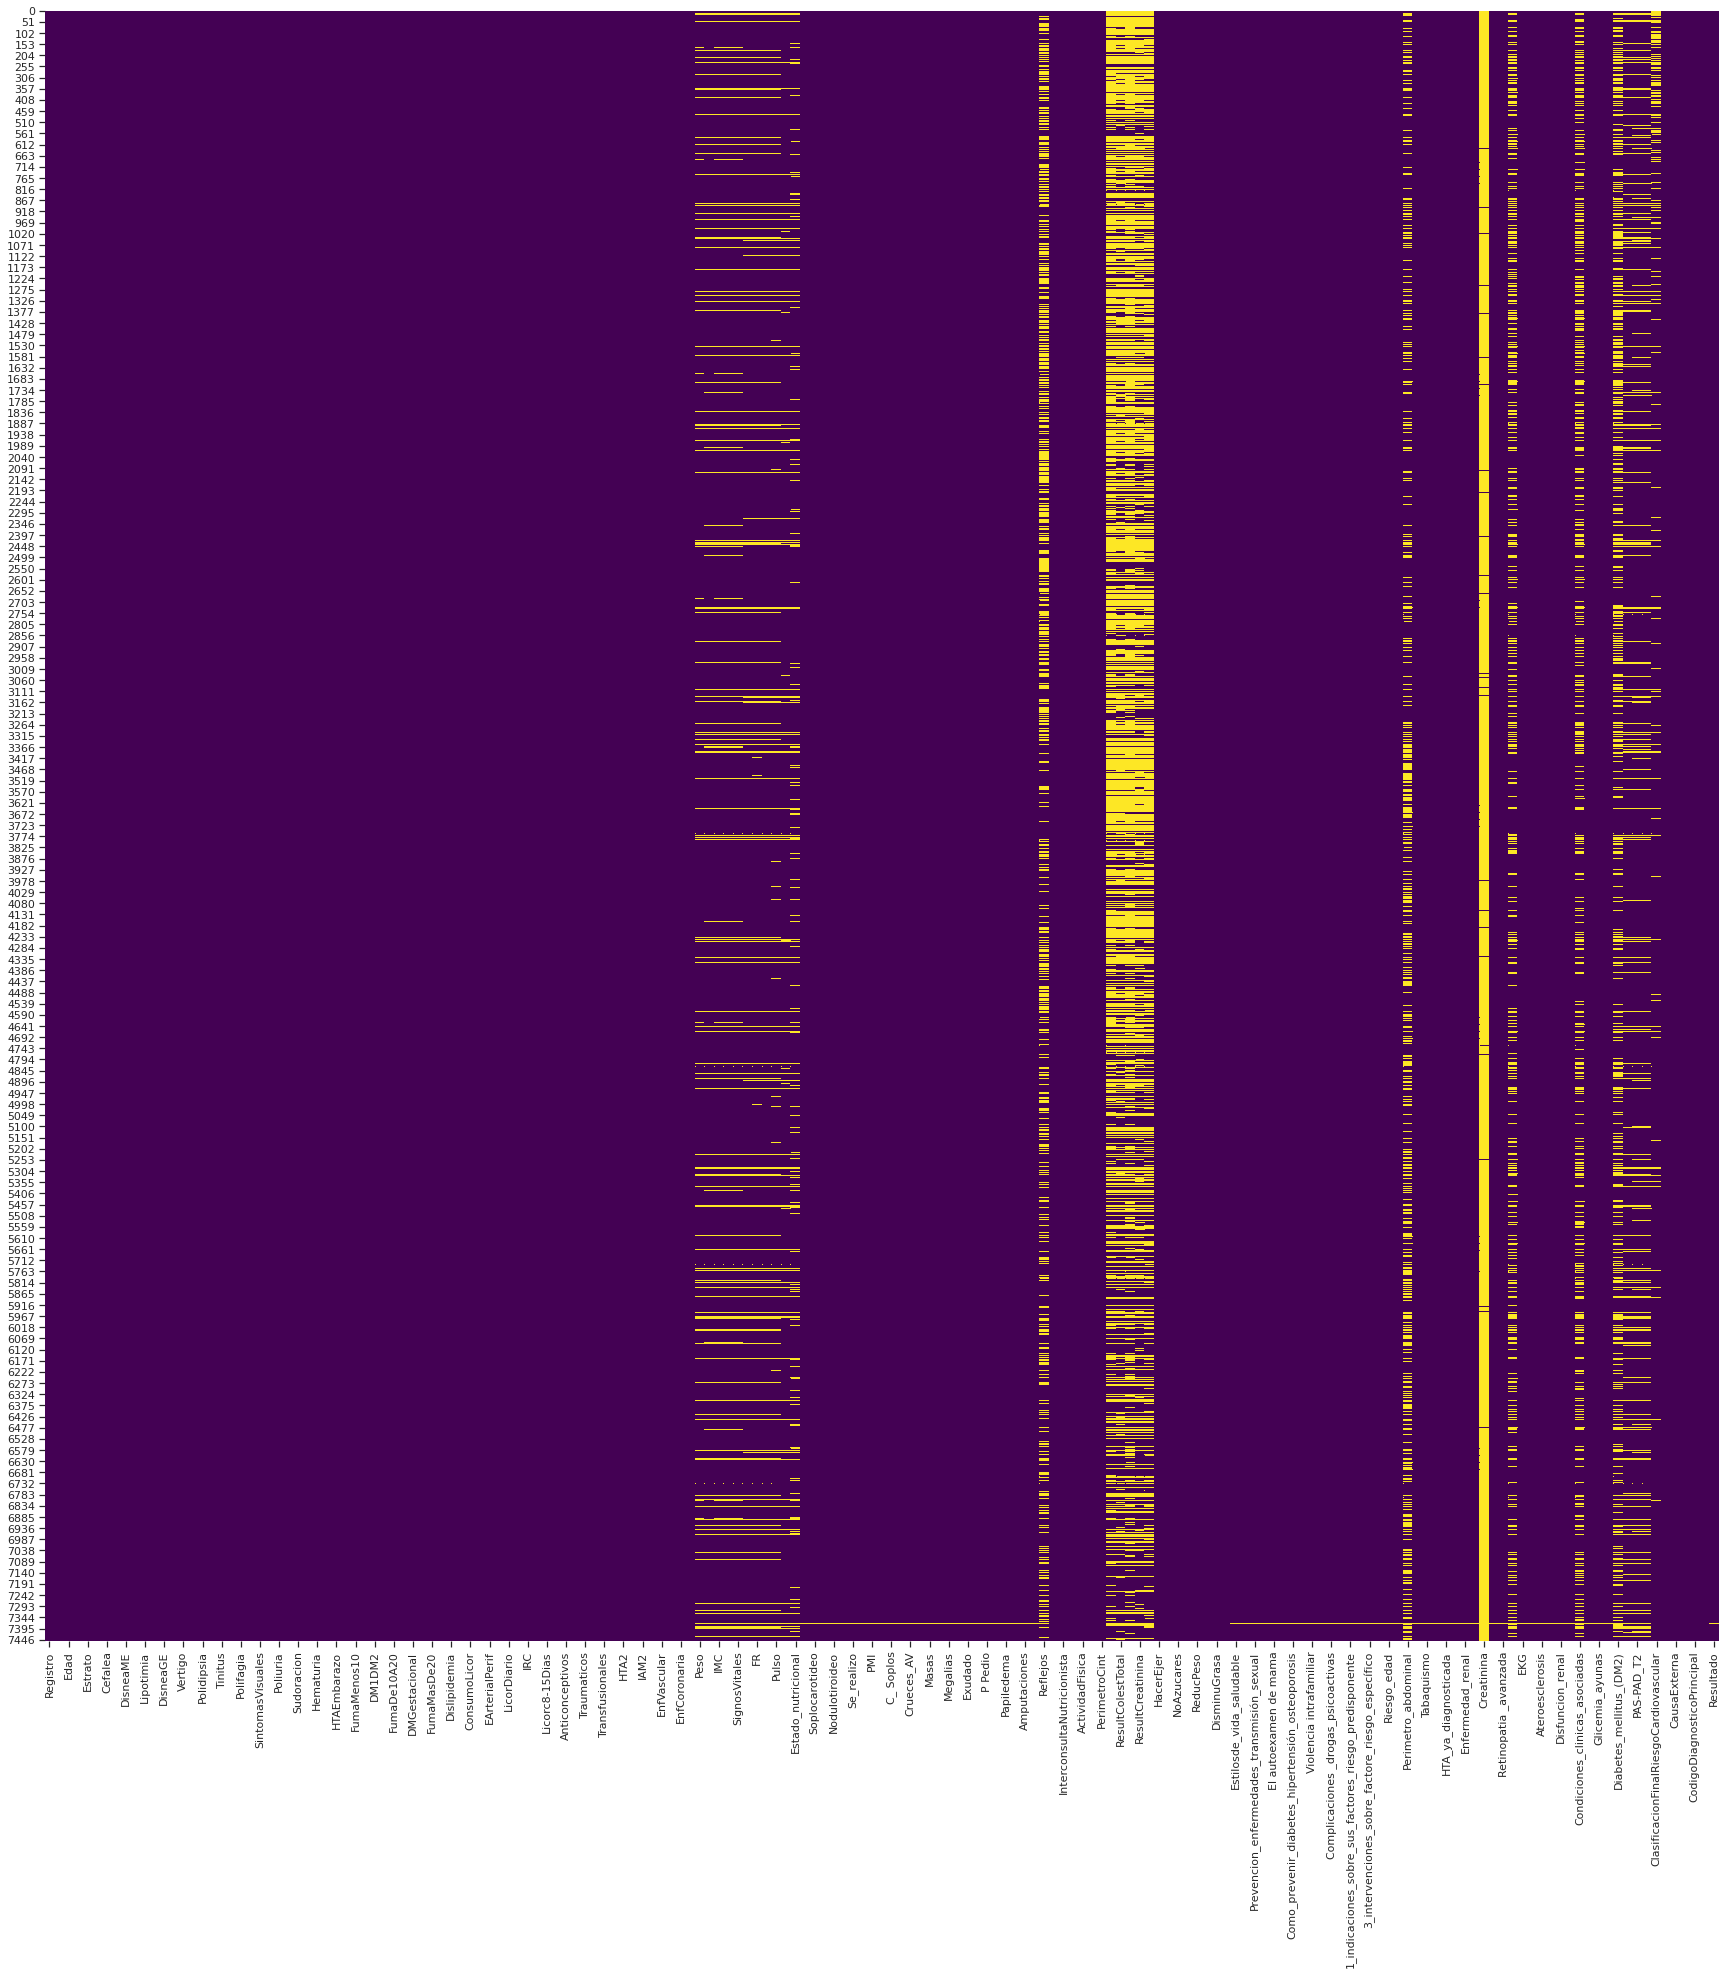

In [ ]:
plt.figure(figsize=(30,30))  # Ajustar el tamaño de la figura (width,height).
sns.heatmap(dataframe.isnull(),cbar=False,cmap='viridis') # Mapa de calor de seaborn


#### **5. Porcentaje de datos faltantes**

In [ ]:
## Porcentaje de valores nulos, que no aportan

descartadas = []

for col in dataframe.columns:
    missing_data = dataframe[col].isnull().sum()
    percentage = missing_data/len(dataframe)
    if percentage >= 0.4:
      descartadas.append({col: round((percentage*100),5)})

    print('{}: {}%'.format(col, round((percentage*100),5)))

Registro: 0.0%
Paciente: 0.0%
Edad: 0.0%
RSSS: 0.0%
Estrato: 0.0%
EstadoCivil: 0.0%
Cefalea: 0.08049%
Epistaxis: 0.08049%
DisneaME: 0.08049%
Disuria: 0.08049%
Lipotimia: 0.08049%
Palpitaciones: 0.08049%
DisneaGE: 0.08049%
Edemas: 0.08049%
Vertigo: 0.08049%
Precordialgia: 0.08049%
Polidipsia: 0.08049%
Claudicacion: 0.08049%
Tinitus: 0.08049%
Ortopnea: 0.08049%
Polifagia: 0.08049%
LesionEnPies: 0.08049%
SintomasVisuales: 0.08049%
DisneaPxNoc: 0.08049%
Poliuria: 0.08049%
DolorNeuritico: 0.08049%
Sudoracion: 0.08049%
DisneaPE: 0.08049%
Hematuria: 0.08049%
HTA1: 0.08049%
HTAEmbarazo: 0.08049%
Retinopatia: 0.08049%
FumaMenos10: 0.08049%
ECVICT: 0.08049%
DM1DM2: 0.08049%
EPOC: 0.08049%
FumaDe10A20: 0.08049%
IAM1: 0.08049%
DMGestacional: 0.08049%
TB: 0.08049%
FumaMasDe20: 0.08049%
Angina: 0.08049%
Dislipidemia: 0.08049%
Asma: 0.08049%
ConsumoLicor: 0.08049%
ICC: 0.08049%
EArterialPerif: 0.08049%
Cancer: 0.08049%
LicorDiario: 0.08049%
SoploCard: 0.08049%
IRC: 0.08049%
Alergicos: 0.08049%
Licorc

**Variables que se descartan**

Debido a que su porcentaje de datos faltantes es mayor al 40%

In [ ]:
print("Se descartarán las siguientes variables: ")
for x in descartadas:
  print(x)

Se descartarán las siguientes variables: 
{'ResultLDL': 56.65415}
{'ResultColestTotal': 50.48296}
{'ResultHDL': 59.99463}
{'ResultCreatinina': 50.18782}
{'TrigliceridosResultado': 51.66354}
{'Creatinina': 98.24255}


#### **6. Columnas por gráficos de mayor interés**



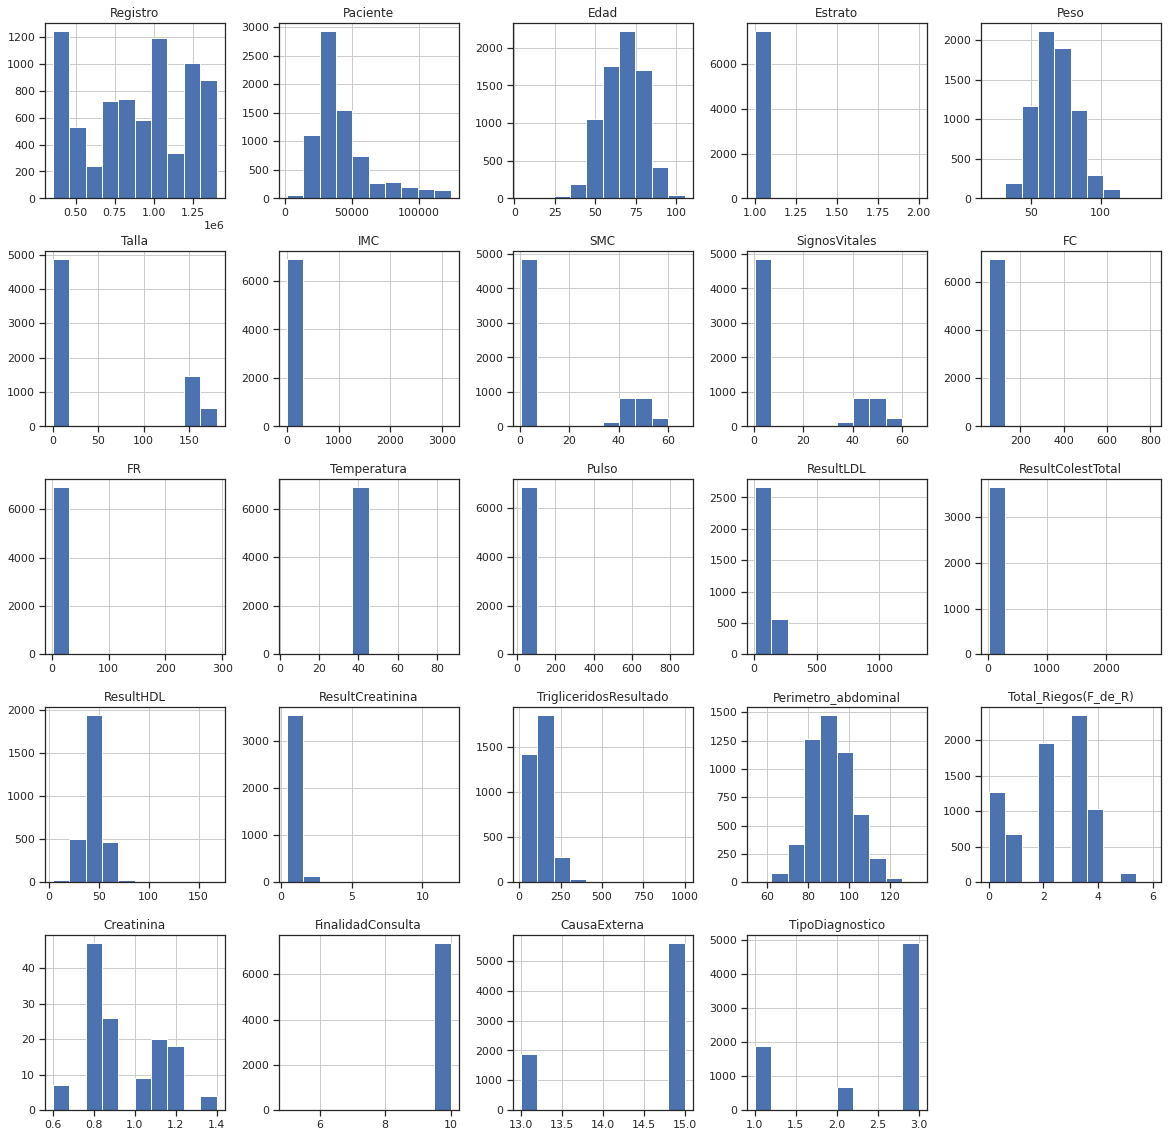

In [ ]:
# Histograma: distribución de los datos por cantidades
p = dataframe.hist(figsize = (20,20))

#### **7. Variables importantes a observar**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

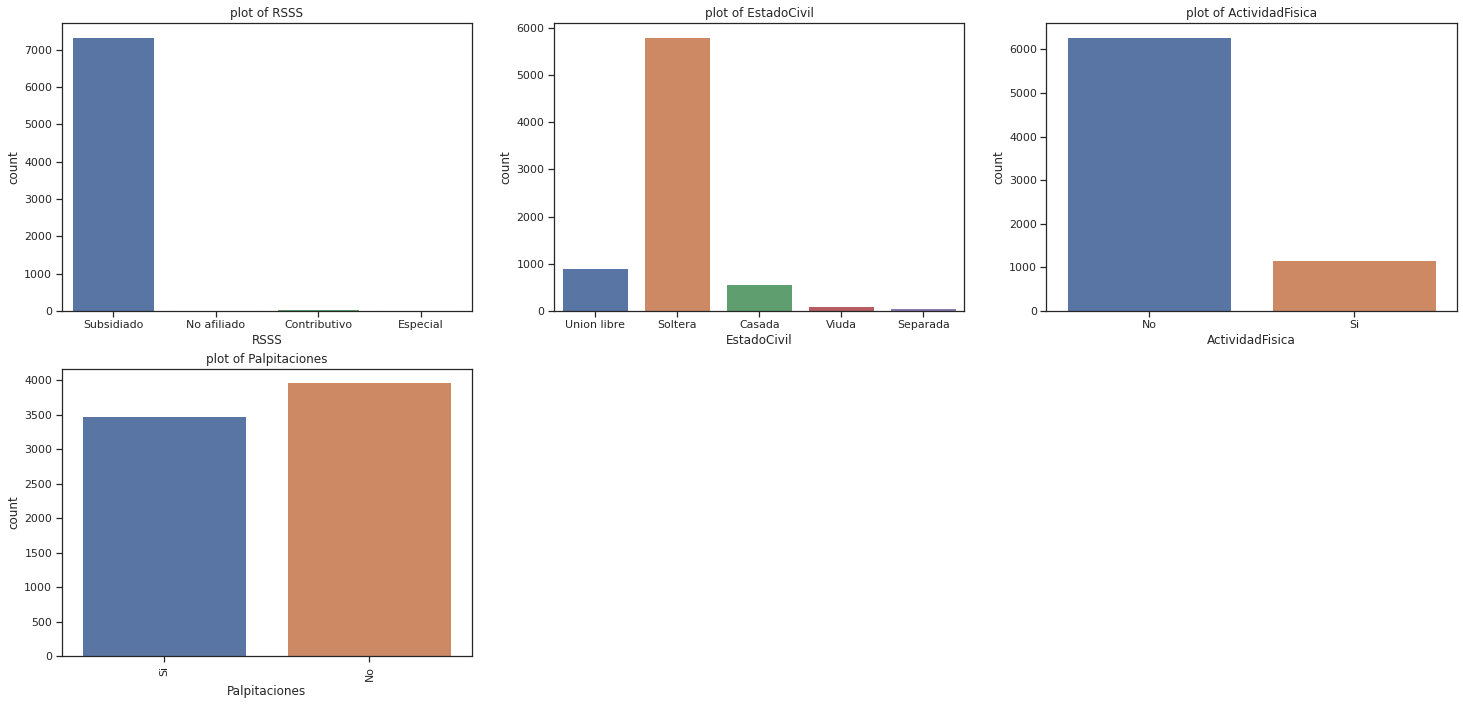

In [ ]:
plt.figure(figsize=(25,18))
vars_to_look = ['RSSS','EstadoCivil','ActividadFisica','Palpitaciones'
                #'Riesgo'
                ]
for i, var in enumerate(vars_to_look):
    plt.subplot(3,3,i+1)
    if i ==3:
        plt.xticks(rotation = 90)
    sns.countplot(dataframe[var])
    plt.title("plot of " + var)   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot of Codigo Diagnostico Principal')

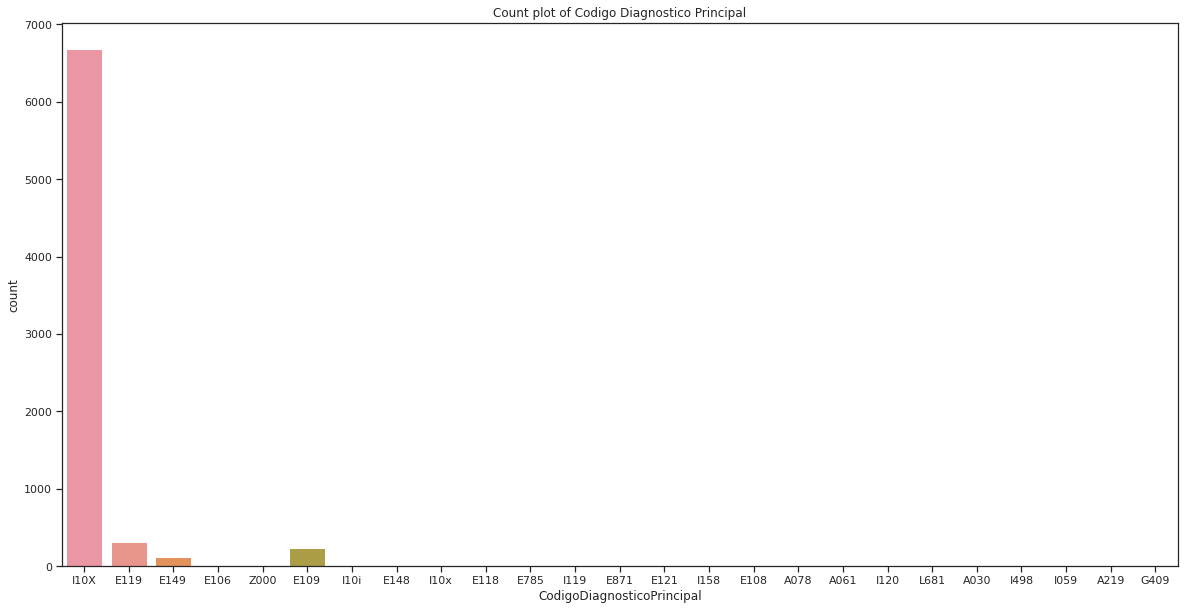

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(dataframe['CodigoDiagnosticoPrincipal'])
plt.title("Count plot of Codigo Diagnostico Principal")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot of Estado_nutricional')

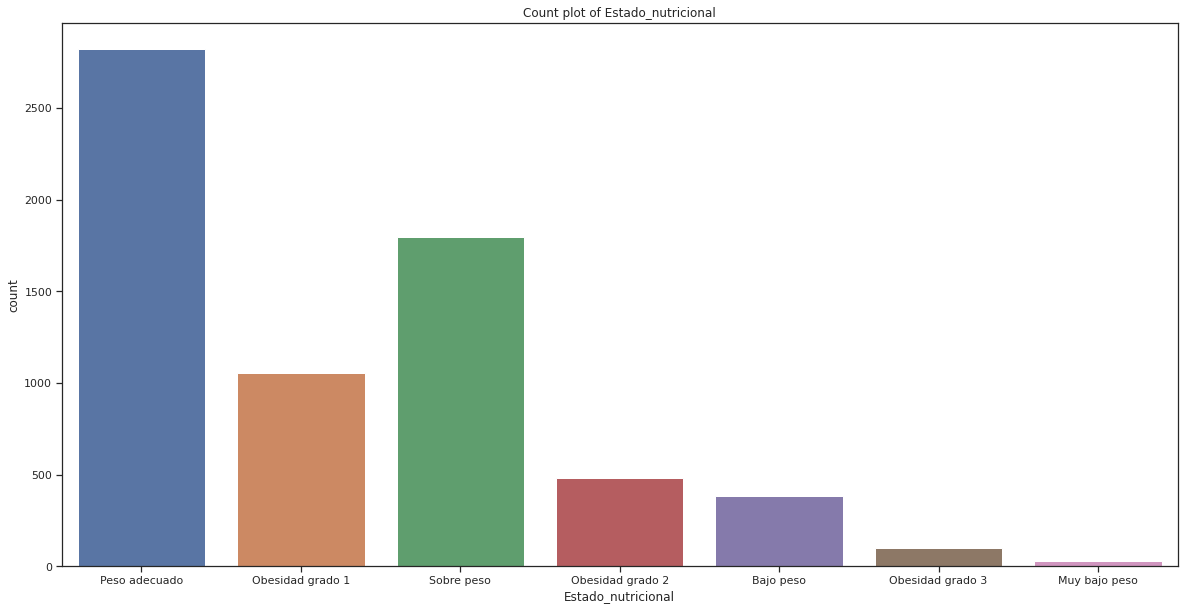

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(dataframe['Estado_nutricional'])
plt.title("Count plot of Estado_nutricional")

**El siguiente gráfico tiene como objeto ver la distribución en los datos en la variable de resultados.**

**Como resultado, se puede ver que los datos están sesgados hacia el valor 1, lo que significa que el número pacientes con hipertensión es más del doble que los que no tienen.**

True     5580
False    1870
Name: Resultado, dtype: int64


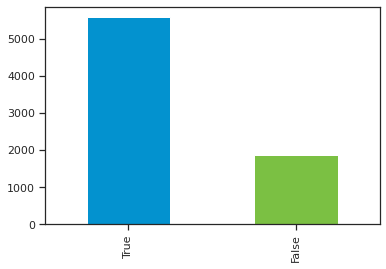

In [ ]:
## Distribución y balance de la variable objetivo
print(dataframe.Resultado.value_counts())
p = dataframe.Resultado.value_counts().plot(kind="bar", color=["#0392cf", "#7bc043"])

#### **8. Verificación y rellenado de datos faltantes**

Se realizo un analisis de datos para verificar los porcentajes de datos faltantes, arrojando como resultado que el 4% de los campos presentan un porcentaje de perdida de datos mayor al 40%, siendo un total de 6 columnas.

In [ ]:
#Eliminando los campos con perdida de datos mayor que el 40%
dataframe_filtrado=dataframe.drop(['ResultLDL','ResultColestTotal','ResultHDL','ResultCreatinina','TrigliceridosResultado','Creatinina'],axis=1)
dataframe_filtrado.head()

,Registro,Paciente,Edad,RSSS,Estrato,EstadoCivil,Cefalea,Epistaxis,DisneaME,Disuria,Lipotimia,Palpitaciones,DisneaGE,Edemas,Vertigo,Precordialgia,Polidipsia,Claudicacion,Tinitus,Ortopnea,Polifagia,LesionEnPies,SintomasVisuales,DisneaPxNoc,Poliuria,DolorNeuritico,Sudoracion,DisneaPE,Hematuria,HTA1,HTAEmbarazo,Retinopatia,FumaMenos10,ECVICT,DM1DM2,EPOC,FumaDe10A20,IAM1,DMGestacional,TB,...,Complicaciones _drogas_psicoactivas,"Autoestima, autocuidado",1_indicaciones_sobre_sus_factores_riesgo_predisponente,2_indicaciones_control_medicina_general_5_años,3_intervenciones_sobre_factore_riesgo_específico,4_citologia_cervico_uterina,Riesgo_edad,Antecedentes_familiares,Perimetro_abdominal,Riesgo_perimetro,Tabaquismo,Displidemia_(cualquiera),HTA_ya_diagnosticada,Total_Riegos(F_de_R),Enfermedad_renal,Nefropatia_diabetica,Enfermedad_arterial_periferica,Retinopatia _avanzada,LOB,EKG,Ecocardiografia,Ateroesclerosis,Ecografia_carotida,Disfuncion_renal,Micro_albuminuria,Condiciones_clinicas_asociadas,Diabetes_mellitus_diagnosticada,Glicemia_ayunas,Glicemia_postprandial,Diabetes_mellitus_(DM2),PAS-PAD_T1,PAS-PAD_T2,PAS-PAD_P,ClasificacionFinalRiesgoCardiovascular,FinalidadConsulta,CausaExterna,TipoDiagnostico,CodigoDiagnosticoPrincipal,DiagnosticoPrincipal,Resultado
0,371520,102669,43,Subsidiado,1,Union libre,No,No,No,No,No,Si,Si,Si,No,No,No,No,No,No,No,No,No,No,No,Si,No,No,No,Si,Si,No,No,No,No,No,No,No,No,No,...,True,True,True,True,True,True,False,False,85.0,False,False,False,True,1.0,Si,No,No,Si,No,False,False,False,False,False,False,No,False,False,False,No,120/80,120/80,120/80,Riesgo bajo,10,15,3,I10X,HIPERTENSION ESENCIAL (PRIMARIA),True
1,376887,103957,46,Subsidiado,1,Union libre,Si,No,No,No,No,Si,No,No,Si,No,No,No,No,No,No,No,No,No,No,Si,No,No,No,Si,No,No,No,No,No,No,No,No,No,No,...,True,True,True,True,True,False,False,False,95.0,True,False,False,True,2.0,Si,No,No,Si,No,False,False,False,False,False,False,NaN,False,False,False,No,110/80,110/80,110/80,NaN,10,15,2,I10X,HIPERTENSION ESENCIAL (PRIMARIA),True
2,367522,104149,68,Subsidiado,1,Union libre,Si,No,No,No,No,Si,Si,No,Si,Si,No,No,No,No,No,No,Si,No,No,Si,No,No,No,Si,No,No,No,No,Si,No,No,No,No,No,...,True,True,True,True,True,False,True,False,112.0,True,False,True,True,4.0,Si,No,No,Si,No,False,False,False,False,False,False,No,True,False,False,Si,130/80,130/80,130/80,NaN,10,15,2,I10X,HIPERTENSION ESENCIAL (PRIMARIA),True
3,376208,106031,53,No afiliado,1,Union libre,Si,Si,No,No,No,Si,Si,No,No,No,No,No,No,No,No,No,Si,No,No,Si,No,No,No,Si,No,No,No,No,No,No,No,No,No,No,...,True,True,True,True,True,False,False,False,88.0,True,False,False,True,2.0,Si,No,No,Si,No,False,False,False,False,False,False,No,False,False,False,No,120/80,120/80,120/80,NaN,10,15,2,I10X,HIPERTENSION ESENCIAL (PRIMARIA),True
4,375671,109902,88,Subsidiado,1,Union libre,Si,No,Si,No,No,Si,Si,Si,Si,Si,No,No,No,No,No,No,No,No,No,Si,No,No,No,Si,No,No,No,No,No,No,No,No,No,No,...,True,True,True,True,True,False,True,False,88.0,False,False,False,True,2.0,Si,No,No,Si,No,False,False,False,False,False,False,No,False,False,False,No,110/80,110/80,110/80,NaN,10,15,2,I10X,HIPERTENSION ESENCIAL (PRIMARIA),True


In [ ]:
dataframe_filtrado.shape

(7454, 169)

In [ ]:
#Rellenado de Dataframe de pacientes con datos faltantes por el metodo de interpolacion lineal
dataframe_filtrado=dataframe_filtrado.interpolate(method='linear')

#Rellenado de Dataframe de pacientes que quedaron con datos faltantes para aplicar metodo pad.
dataframe_filtrado=dataframe_filtrado.fillna(method='pad')

for col in dataframe_filtrado.columns:
    missing_data = dataframe_filtrado[col].isnull().sum()
    print('{}: {}'.format(col, missing_data))


Registro: 0
Paciente: 0
Edad: 0
RSSS: 0
Estrato: 0
EstadoCivil: 0
Cefalea: 0
Epistaxis: 0
DisneaME: 0
Disuria: 0
Lipotimia: 0
Palpitaciones: 0
DisneaGE: 0
Edemas: 0
Vertigo: 0
Precordialgia: 0
Polidipsia: 0
Claudicacion: 0
Tinitus: 0
Ortopnea: 0
Polifagia: 0
LesionEnPies: 0
SintomasVisuales: 0
DisneaPxNoc: 0
Poliuria: 0
DolorNeuritico: 0
Sudoracion: 0
DisneaPE: 0
Hematuria: 0
HTA1: 0
HTAEmbarazo: 0
Retinopatia: 0
FumaMenos10: 0
ECVICT: 0
DM1DM2: 0
EPOC: 0
FumaDe10A20: 0
IAM1: 0
DMGestacional: 0
TB: 0
FumaMasDe20: 0
Angina: 0
Dislipidemia: 0
Asma: 0
ConsumoLicor: 0
ICC: 0
EArterialPerif: 0
Cancer: 0
LicorDiario: 0
SoploCard: 0
IRC: 0
Alergicos: 0
Licorc8-15Dias: 0
Anticoagulacion: 0
Anticonceptivos: 0
Menopausia: 0
Traumaticos: 0
Quirurgicos: 0
Transfusionales: 0
Hospitalarios: 0
HTA2: 0
Obesidad: 0
IAM2: 0
Nefropatia: 0
EnfVascular: 0
Hipertiroidismo: 0
EnfCoronaria: 0
Hipotiroidismo: 0
Peso: 0
Talla: 0
IMC: 0
SMC: 0
SignosVitales: 0
FC: 0
FR: 0
Temperatura: 0
Pulso: 0
Tension_arterial

In [ ]:
#Rellenado de dos columnas que quedaron pendientes utilizando funcion replace
dataframe_filtrado.DiagnosticoPrincipal =dataframe_filtrado.DiagnosticoPrincipal.replace({np.nan:'NO ESPECIFICADA SIN MENCION DE COMPLICACION'})
df_1_filtrado = dataframe_filtrado.iloc[:,0:99]
df_2_filtrado = dataframe_filtrado.iloc[:,100:171]

In [ ]:
#Conversion a binario si=1 y no=0
dataframe_filtrado=dataframe_filtrado.replace({'No':0, 'Si': 1,'true':1,'false':0,'True':1,'False':0})

In [ ]:
dataframe_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7454 entries, 0 to 7453
Columns: 169 entries, Registro to Resultado
dtypes: bool(32), float64(11), int64(115), object(11)
memory usage: 8.0+ MB


In [ ]:
for col in dataframe_filtrado.columns:
    missing_data = dataframe_filtrado[col].isnull().sum()
    print('{}: {}'.format(col, missing_data))

Registro: 0
Paciente: 0
Edad: 0
RSSS: 0
Estrato: 0
EstadoCivil: 0
Cefalea: 0
Epistaxis: 0
DisneaME: 0
Disuria: 0
Lipotimia: 0
Palpitaciones: 0
DisneaGE: 0
Edemas: 0
Vertigo: 0
Precordialgia: 0
Polidipsia: 0
Claudicacion: 0
Tinitus: 0
Ortopnea: 0
Polifagia: 0
LesionEnPies: 0
SintomasVisuales: 0
DisneaPxNoc: 0
Poliuria: 0
DolorNeuritico: 0
Sudoracion: 0
DisneaPE: 0
Hematuria: 0
HTA1: 0
HTAEmbarazo: 0
Retinopatia: 0
FumaMenos10: 0
ECVICT: 0
DM1DM2: 0
EPOC: 0
FumaDe10A20: 0
IAM1: 0
DMGestacional: 0
TB: 0
FumaMasDe20: 0
Angina: 0
Dislipidemia: 0
Asma: 0
ConsumoLicor: 0
ICC: 0
EArterialPerif: 0
Cancer: 0
LicorDiario: 0
SoploCard: 0
IRC: 0
Alergicos: 0
Licorc8-15Dias: 0
Anticoagulacion: 0
Anticonceptivos: 0
Menopausia: 0
Traumaticos: 0
Quirurgicos: 0
Transfusionales: 0
Hospitalarios: 0
HTA2: 0
Obesidad: 0
IAM2: 0
Nefropatia: 0
EnfVascular: 0
Hipertiroidismo: 0
EnfCoronaria: 0
Hipotiroidismo: 0
Peso: 0
Talla: 0
IMC: 0
SMC: 0
SignosVitales: 0
FC: 0
FR: 0
Temperatura: 0
Pulso: 0
Tension_arterial

In [ ]:
#Imprimiendo informacion acerca de los campos df1_filtrado
df_1_filtrado.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7454 entries, 0 to 7453
Data columns (total 99 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Registro            7454 non-null   int64  
 1   Paciente            7454 non-null   int64  
 2   Edad                7454 non-null   int64  
 3   RSSS                7454 non-null   object 
 4   Estrato             7454 non-null   int64  
 5   EstadoCivil         7454 non-null   object 
 6   Cefalea             7454 non-null   object 
 7   Epistaxis           7454 non-null   object 
 8   DisneaME            7454 non-null   object 
 9   Disuria             7454 non-null   object 
 10  Lipotimia           7454 non-null   object 
 11  Palpitaciones       7454 non-null   object 
 12  DisneaGE            7454 non-null   object 
 13  Edemas              7454 non-null   object 
 14  Vertigo             7454 non-null   object 
 15  Precordialgia       7454 non-null   object 
 16  Polidi

In [ ]:
#Imprimiendo informacion acerca de los campos df2_filtrado
df_2_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7454 entries, 0 to 7453
Data columns (total 69 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Papiledema                                              7454 non-null   object 
 1   Úlceras                                                 7454 non-null   object 
 2   Amputaciones                                            7454 non-null   object 
 3   Hemorragias                                             7454 non-null   object 
 4   Reflejos                                                7453 non-null   object 
 5   PredominioIngestaDeGrasa                                7454 non-null   object 
 6   InterconsultaNutricionista                              7454 non-null   object 
 7   ConsumeVerdFrutas                                       7454 non-null   object 
 8   ActividadFisica                       

####**9. Mapa de calor de faltantes con los datos filtrados**

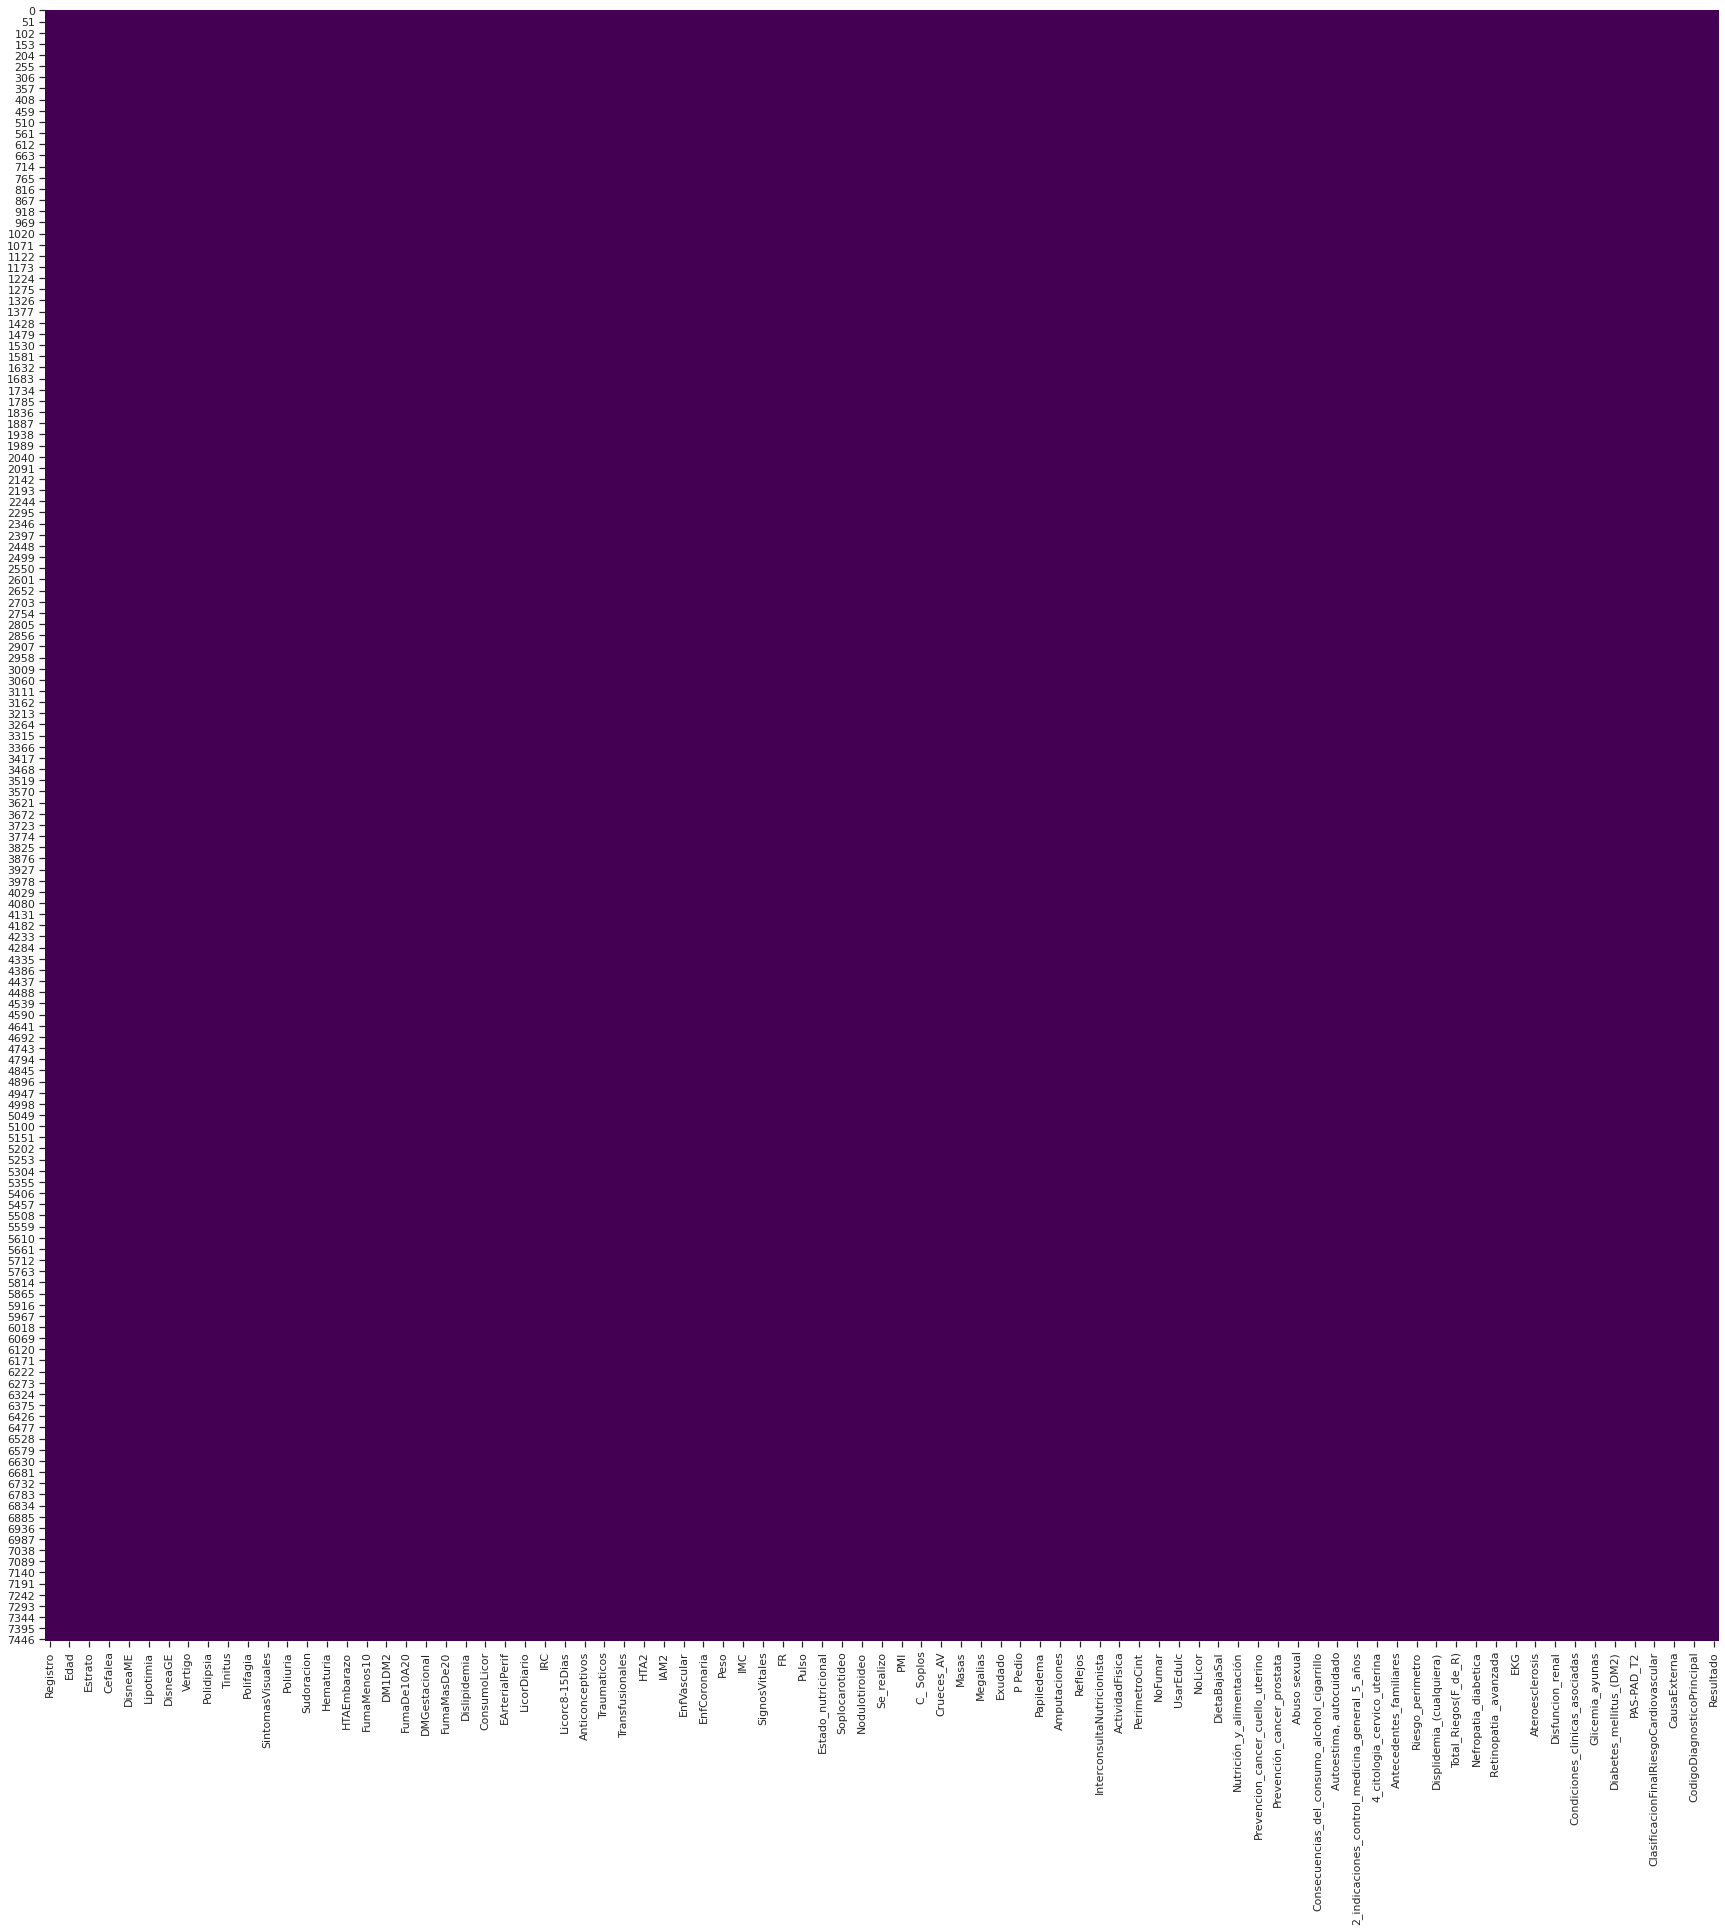

In [ ]:
plt.figure(figsize=(30,30))  # Ajustar el tamaño de la figura (width,height).
sns.heatmap(dataframe_filtrado.isnull(),cbar=False,cmap='viridis')

In [ ]:
dataframe_filtrado.shape

(7454, 169)

In [ ]:
#identificando variables categoricas
categoricals = dataframe_filtrado.select_dtypes(include=['object']).copy()
print(categoricals.head())
print(categoricals.isnull().sum())

          RSSS  ...              DiagnosticoPrincipal
0   Subsidiado  ...  HIPERTENSION ESENCIAL (PRIMARIA)
1   Subsidiado  ...  HIPERTENSION ESENCIAL (PRIMARIA)
2   Subsidiado  ...  HIPERTENSION ESENCIAL (PRIMARIA)
3  No afiliado  ...  HIPERTENSION ESENCIAL (PRIMARIA)
4   Subsidiado  ...  HIPERTENSION ESENCIAL (PRIMARIA)

[5 rows x 11 columns]
RSSS                                      0
EstadoCivil                               0
Tension_arterial                          0
Estado_nutricional                        0
Reflejos                                  1
PAS-PAD_T1                                0
PAS-PAD_T2                                0
PAS-PAD_P                                 0
ClasificacionFinalRiesgoCardiovascular    0
CodigoDiagnosticoPrincipal                0
DiagnosticoPrincipal                      0
dtype: int64


In [ ]:
dataframe.shape

(7454, 175)

In [ ]:
dataframe_filtrado.head()

,Registro,Paciente,Edad,RSSS,Estrato,EstadoCivil,Cefalea,Epistaxis,DisneaME,Disuria,Lipotimia,Palpitaciones,DisneaGE,Edemas,Vertigo,Precordialgia,Polidipsia,Claudicacion,Tinitus,Ortopnea,Polifagia,LesionEnPies,SintomasVisuales,DisneaPxNoc,Poliuria,DolorNeuritico,Sudoracion,DisneaPE,Hematuria,HTA1,HTAEmbarazo,Retinopatia,FumaMenos10,ECVICT,DM1DM2,EPOC,FumaDe10A20,IAM1,DMGestacional,TB,...,Complicaciones _drogas_psicoactivas,"Autoestima, autocuidado",1_indicaciones_sobre_sus_factores_riesgo_predisponente,2_indicaciones_control_medicina_general_5_años,3_intervenciones_sobre_factore_riesgo_específico,4_citologia_cervico_uterina,Riesgo_edad,Antecedentes_familiares,Perimetro_abdominal,Riesgo_perimetro,Tabaquismo,Displidemia_(cualquiera),HTA_ya_diagnosticada,Total_Riegos(F_de_R),Enfermedad_renal,Nefropatia_diabetica,Enfermedad_arterial_periferica,Retinopatia _avanzada,LOB,EKG,Ecocardiografia,Ateroesclerosis,Ecografia_carotida,Disfuncion_renal,Micro_albuminuria,Condiciones_clinicas_asociadas,Diabetes_mellitus_diagnosticada,Glicemia_ayunas,Glicemia_postprandial,Diabetes_mellitus_(DM2),PAS-PAD_T1,PAS-PAD_T2,PAS-PAD_P,ClasificacionFinalRiesgoCardiovascular,FinalidadConsulta,CausaExterna,TipoDiagnostico,CodigoDiagnosticoPrincipal,DiagnosticoPrincipal,Resultado
0,371520,102669,43,Subsidiado,1,Union libre,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,True,True,True,True,True,True,False,False,85.0,False,False,False,True,1.0,1,0,0,1,0,False,False,False,False,False,False,0,False,False,False,0,120/80,120/80,120/80,Riesgo bajo,10,15,3,I10X,HIPERTENSION ESENCIAL (PRIMARIA),True
1,376887,103957,46,Subsidiado,1,Union libre,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,True,True,True,True,True,False,False,False,95.0,True,False,False,True,2.0,1,0,0,1,0,False,False,False,False,False,False,0,False,False,False,0,110/80,110/80,110/80,Riesgo bajo,10,15,2,I10X,HIPERTENSION ESENCIAL (PRIMARIA),True
2,367522,104149,68,Subsidiado,1,Union libre,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,True,True,True,True,True,False,True,False,112.0,True,False,True,True,4.0,1,0,0,1,0,False,False,False,False,False,False,0,True,False,False,1,130/80,130/80,130/80,Riesgo bajo,10,15,2,I10X,HIPERTENSION ESENCIAL (PRIMARIA),True
3,376208,106031,53,No afiliado,1,Union libre,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,True,True,True,True,True,False,False,False,88.0,True,False,False,True,2.0,1,0,0,1,0,False,False,False,False,False,False,0,False,False,False,0,120/80,120/80,120/80,Riesgo bajo,10,15,2,I10X,HIPERTENSION ESENCIAL (PRIMARIA),True
4,375671,109902,88,Subsidiado,1,Union libre,1,0,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,True,True,True,True,True,False,True,False,88.0,False,False,False,True,2.0,1,0,0,1,0,False,False,False,False,False,False,0,False,False,False,0,110/80,110/80,110/80,Riesgo bajo,10,15,2,I10X,HIPERTENSION ESENCIAL (PRIMARIA),True


In [ ]:
print("RSSS")
print(dataframe_filtrado.RSSS.unique())
print()
print("cantidad categorías: ", len(dataframe_filtrado.RSSS.unique()))
print("--------------------------------")

print("EstadoCivil")
print(dataframe_filtrado.EstadoCivil.unique())
print()
print("cantidad categorías: ", len(dataframe_filtrado.EstadoCivil.unique()))
print("--------------------------------")

print("IMC")
print(dataframe_filtrado.IMC.unique())
print()
print("cantidad categorías: ", len(dataframe_filtrado.IMC.unique()))
print("--------------------------------")

print("Reflejos")
print(dataframe_filtrado.Reflejos.unique())
print()
print("cantidad categorías: ", len(dataframe_filtrado.Reflejos.unique()))
print("--------------------------------")

print("Tension_arterial")
print(dataframe_filtrado.Tension_arterial.unique())
print()
print("cantidad categorías: ", len(dataframe_filtrado.Tension_arterial.unique()))
print("--------------------------------")

RSSS
['Subsidiado' 'No afiliado' 'Contributivo' 'Especial']

cantidad categorías:  4
--------------------------------
EstadoCivil
['Union libre' 'Soltera' 'Casada' 'Viuda' 'Separada']

cantidad categorías:  5
--------------------------------
IMC
[2.20385675e+01 3.30600000e+01 3.11400000e+01 2.70600000e+01
 2.25100000e+01 2.70100000e+01 2.68900000e+01 0.00000000e+00
 1.93700000e+01 2.05600000e+01 2.17500000e+01 1.96500000e+01
 2.51000000e+01 2.68966667e+01 2.86933333e+01 3.04900000e+01
 2.30300000e+01 1.60200000e+01 8.01000000e+00 1.57900000e+01
 1.99800000e+01 2.00300000e+01 1.94400000e+01 2.46500000e+01
 2.40300000e+01 2.66700000e+01 2.35000000e+01 3.16400000e+01
 2.36800000e+01 2.29400000e+01 8.63000000e+00 1.72600000e+01
 2.96700000e+01 2.79400000e+01 2.72700000e+01 2.28600000e+01
 2.64000000e+01 1.64400000e+01 3.28800000e+01 2.47500000e+01
 1.23750000e+01 3.04800000e+01 2.78900000e+01 2.84000000e+01
 1.80300000e+01 2.46100000e+01 2.09300000e+01 2.81300000e+01
 2.00800000e+01 2.6160

#### **10. Transformación de columnas**

In [ ]:
print('-----total de filas:',len(dataframe_filtrado['ClasificacionFinalRiesgoCardiovascular']))
#eliminar filas con valores nan en la variable dependiente
print('-----catidad de valores NaN:',dataframe_filtrado['ClasificacionFinalRiesgoCardiovascular'].isnull().sum())
dataframe_filtrado=dataframe_filtrado.dropna(subset=['ClasificacionFinalRiesgoCardiovascular'])
print('-----catidad de valores resultantes:',len(dataframe_filtrado['ClasificacionFinalRiesgoCardiovascular']))

-----total de filas: 7454
-----catidad de valores NaN: 0
-----catidad de valores resultantes: 7454


In [ ]:
dataframe_filtrado.shape

(7454, 169)

In [ ]:
print("ClasificacionFinalRiesgoCardiovascular")
print(dataframe_filtrado.ClasificacionFinalRiesgoCardiovascular.unique())
print()
print("cantidad de categorías de la variable de respuesta: ", len(dataframe_filtrado.ClasificacionFinalRiesgoCardiovascular.unique()))

ClasificacionFinalRiesgoCardiovascular
['Riesgo bajo' 'Riesgo moderado' 'Riesgo alto' 'Riesgo muy alto'
 'Riesgo promedio no intervención' 'Riesgo promedio']

cantidad de categorías de la variable de respuesta:  6


In [ ]:
mapp2={'Riesgo bajo':3,
      'Riesgo moderado':2,
      'Riesgo alto':1 #Riesgo alto
     }
dataframe_filtrado['ClasificacionFinalRiesgoCardiovascular']=dataframe_filtrado['ClasificacionFinalRiesgoCardiovascular'].map(mapp2)

In [ ]:
dataframe_filtrado.head()

,Registro,Paciente,Edad,RSSS,Estrato,EstadoCivil,Cefalea,Epistaxis,DisneaME,Disuria,Lipotimia,Palpitaciones,DisneaGE,Edemas,Vertigo,Precordialgia,Polidipsia,Claudicacion,Tinitus,Ortopnea,Polifagia,LesionEnPies,SintomasVisuales,DisneaPxNoc,Poliuria,DolorNeuritico,Sudoracion,DisneaPE,Hematuria,HTA1,HTAEmbarazo,Retinopatia,FumaMenos10,ECVICT,DM1DM2,EPOC,FumaDe10A20,IAM1,DMGestacional,TB,...,Complicaciones _drogas_psicoactivas,"Autoestima, autocuidado",1_indicaciones_sobre_sus_factores_riesgo_predisponente,2_indicaciones_control_medicina_general_5_años,3_intervenciones_sobre_factore_riesgo_específico,4_citologia_cervico_uterina,Riesgo_edad,Antecedentes_familiares,Perimetro_abdominal,Riesgo_perimetro,Tabaquismo,Displidemia_(cualquiera),HTA_ya_diagnosticada,Total_Riegos(F_de_R),Enfermedad_renal,Nefropatia_diabetica,Enfermedad_arterial_periferica,Retinopatia _avanzada,LOB,EKG,Ecocardiografia,Ateroesclerosis,Ecografia_carotida,Disfuncion_renal,Micro_albuminuria,Condiciones_clinicas_asociadas,Diabetes_mellitus_diagnosticada,Glicemia_ayunas,Glicemia_postprandial,Diabetes_mellitus_(DM2),PAS-PAD_T1,PAS-PAD_T2,PAS-PAD_P,ClasificacionFinalRiesgoCardiovascular,FinalidadConsulta,CausaExterna,TipoDiagnostico,CodigoDiagnosticoPrincipal,DiagnosticoPrincipal,Resultado
0,371520,102669,43,Subsidiado,1,Union libre,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,True,True,True,True,True,True,False,False,85.0,False,False,False,True,1.0,1,0,0,1,0,False,False,False,False,False,False,0,False,False,False,0,120/80,120/80,120/80,3.0,10,15,3,I10X,HIPERTENSION ESENCIAL (PRIMARIA),True
1,376887,103957,46,Subsidiado,1,Union libre,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,True,True,True,True,True,False,False,False,95.0,True,False,False,True,2.0,1,0,0,1,0,False,False,False,False,False,False,0,False,False,False,0,110/80,110/80,110/80,3.0,10,15,2,I10X,HIPERTENSION ESENCIAL (PRIMARIA),True
2,367522,104149,68,Subsidiado,1,Union libre,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,True,True,True,True,True,False,True,False,112.0,True,False,True,True,4.0,1,0,0,1,0,False,False,False,False,False,False,0,True,False,False,1,130/80,130/80,130/80,3.0,10,15,2,I10X,HIPERTENSION ESENCIAL (PRIMARIA),True
3,376208,106031,53,No afiliado,1,Union libre,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,True,True,True,True,True,False,False,False,88.0,True,False,False,True,2.0,1,0,0,1,0,False,False,False,False,False,False,0,False,False,False,0,120/80,120/80,120/80,3.0,10,15,2,I10X,HIPERTENSION ESENCIAL (PRIMARIA),True
4,375671,109902,88,Subsidiado,1,Union libre,1,0,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,True,True,True,True,True,False,True,False,88.0,False,False,False,True,2.0,1,0,0,1,0,False,False,False,False,False,False,0,False,False,False,0,110/80,110/80,110/80,3.0,10,15,2,I10X,HIPERTENSION ESENCIAL (PRIMARIA),True


In [ ]:
for col in dataframe_filtrado.columns:
    missing_data = dataframe_filtrado[col].isnull().sum()
    percentage = missing_data/len(dataframe_filtrado)

    print('{}: {}%'.format(col, round((percentage*100),5)))

Registro: 0.0%
Paciente: 0.0%
Edad: 0.0%
RSSS: 0.0%
Estrato: 0.0%
EstadoCivil: 0.0%
Cefalea: 0.0%
Epistaxis: 0.0%
DisneaME: 0.0%
Disuria: 0.0%
Lipotimia: 0.0%
Palpitaciones: 0.0%
DisneaGE: 0.0%
Edemas: 0.0%
Vertigo: 0.0%
Precordialgia: 0.0%
Polidipsia: 0.0%
Claudicacion: 0.0%
Tinitus: 0.0%
Ortopnea: 0.0%
Polifagia: 0.0%
LesionEnPies: 0.0%
SintomasVisuales: 0.0%
DisneaPxNoc: 0.0%
Poliuria: 0.0%
DolorNeuritico: 0.0%
Sudoracion: 0.0%
DisneaPE: 0.0%
Hematuria: 0.0%
HTA1: 0.0%
HTAEmbarazo: 0.0%
Retinopatia: 0.0%
FumaMenos10: 0.0%
ECVICT: 0.0%
DM1DM2: 0.0%
EPOC: 0.0%
FumaDe10A20: 0.0%
IAM1: 0.0%
DMGestacional: 0.0%
TB: 0.0%
FumaMasDe20: 0.0%
Angina: 0.0%
Dislipidemia: 0.0%
Asma: 0.0%
ConsumoLicor: 0.0%
ICC: 0.0%
EArterialPerif: 0.0%
Cancer: 0.0%
LicorDiario: 0.0%
SoploCard: 0.0%
IRC: 0.0%
Alergicos: 0.0%
Licorc8-15Dias: 0.0%
Anticoagulacion: 0.0%
Anticonceptivos: 0.0%
Menopausia: 0.0%
Traumaticos: 0.0%
Quirurgicos: 0.0%
Transfusionales: 0.0%
Hospitalarios: 0.0%
HTA2: 0.0%
Obesidad: 0.0%
IAM2

In [ ]:
dataframe_filtrado['ClasificacionFinalRiesgoCardiovascular'].unique()

array([ 3.,  2.,  1., nan])

In [ ]:
dataframe_filtrado.shape

(7454, 169)

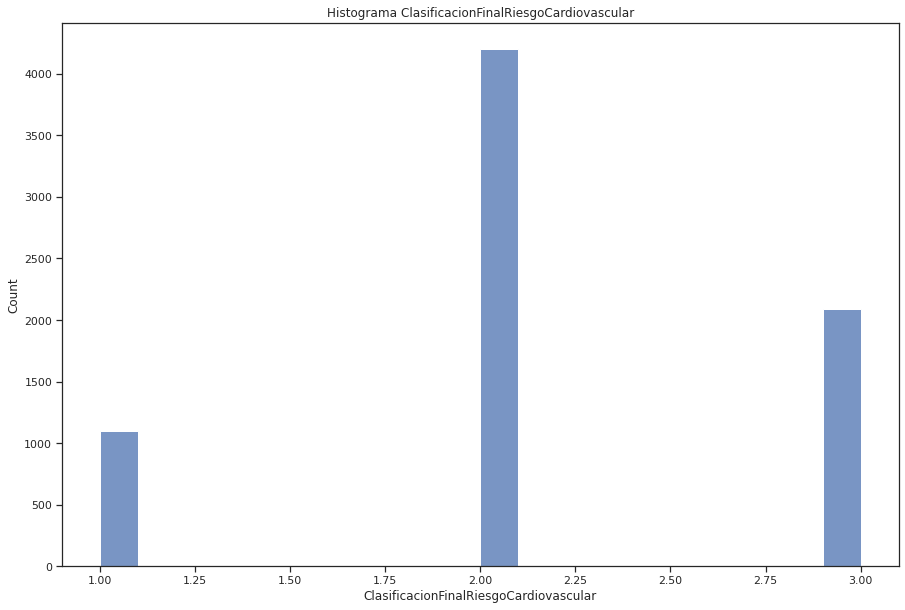

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(dataframe_filtrado['ClasificacionFinalRiesgoCardiovascular'])
plt.title('Histograma ClasificacionFinalRiesgoCardiovascular')
plt.show()

#### **11. Implementacion de Dummies a variables categoricas.**

In [ ]:
dataframe_filtrado=dataframe_filtrado
dataframe_dummies = pd.get_dummies(dataframe_filtrado, columns=['EstadoCivil'])
dataframe_dummies = pd.get_dummies(dataframe_dummies, columns=['CodigoDiagnosticoPrincipal'])
#dataframemmies=dataframe_dummies.drop(['EstadoCivil','CodigoDiagnosticoPrincipal'],axis=1)
dataframe_dummies.head()

,Registro,Paciente,Edad,RSSS,Estrato,Cefalea,Epistaxis,DisneaME,Disuria,Lipotimia,Palpitaciones,DisneaGE,Edemas,Vertigo,Precordialgia,Polidipsia,Claudicacion,Tinitus,Ortopnea,Polifagia,LesionEnPies,SintomasVisuales,DisneaPxNoc,Poliuria,DolorNeuritico,Sudoracion,DisneaPE,Hematuria,HTA1,HTAEmbarazo,Retinopatia,FumaMenos10,ECVICT,DM1DM2,EPOC,FumaDe10A20,IAM1,DMGestacional,TB,FumaMasDe20,...,Diabetes_mellitus_(DM2),PAS-PAD_T1,PAS-PAD_T2,PAS-PAD_P,ClasificacionFinalRiesgoCardiovascular,FinalidadConsulta,CausaExterna,TipoDiagnostico,DiagnosticoPrincipal,Resultado,EstadoCivil_Casada,EstadoCivil_Separada,EstadoCivil_Soltera,EstadoCivil_Union libre,EstadoCivil_Viuda,CodigoDiagnosticoPrincipal_A030,CodigoDiagnosticoPrincipal_A061,CodigoDiagnosticoPrincipal_A078,CodigoDiagnosticoPrincipal_A219,CodigoDiagnosticoPrincipal_E106,CodigoDiagnosticoPrincipal_E108,CodigoDiagnosticoPrincipal_E109,CodigoDiagnosticoPrincipal_E118,CodigoDiagnosticoPrincipal_E119,CodigoDiagnosticoPrincipal_E121,CodigoDiagnosticoPrincipal_E148,CodigoDiagnosticoPrincipal_E149,CodigoDiagnosticoPrincipal_E785,CodigoDiagnosticoPrincipal_E871,CodigoDiagnosticoPrincipal_G409,CodigoDiagnosticoPrincipal_I059,CodigoDiagnosticoPrincipal_I10X,CodigoDiagnosticoPrincipal_I10i,CodigoDiagnosticoPrincipal_I10x,CodigoDiagnosticoPrincipal_I119,CodigoDiagnosticoPrincipal_I120,CodigoDiagnosticoPrincipal_I158,CodigoDiagnosticoPrincipal_I498,CodigoDiagnosticoPrincipal_L681,CodigoDiagnosticoPrincipal_Z000
0,371520,102669,43,Subsidiado,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,...,0,120/80,120/80,120/80,3.0,10,15,3,HIPERTENSION ESENCIAL (PRIMARIA),True,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,376887,103957,46,Subsidiado,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,110/80,110/80,110/80,3.0,10,15,2,HIPERTENSION ESENCIAL (PRIMARIA),True,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,367522,104149,68,Subsidiado,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,1,130/80,130/80,130/80,3.0,10,15,2,HIPERTENSION ESENCIAL (PRIMARIA),True,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,376208,106031,53,No afiliado,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,120/80,120/80,120/80,3.0,10,15,2,HIPERTENSION ESENCIAL (PRIMARIA),True,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,375671,109902,88,Subsidiado,1,1,0,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,110/80,110/80,110/80,3.0,10,15,2,HIPERTENSION ESENCIAL (PRIMARIA),True,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
#identificando variables categoricas por tercera vez
categoricals2 = dataframe_dummies.select_dtypes(include=['object']).copy()
print(categoricals2.head())
print(categoricals2.isnull().sum())

          RSSS Tension_arterial  ... PAS-PAD_P              DiagnosticoPrincipal
0   Subsidiado           120/80  ...    120/80  HIPERTENSION ESENCIAL (PRIMARIA)
1   Subsidiado           110/80  ...    110/80  HIPERTENSION ESENCIAL (PRIMARIA)
2   Subsidiado           130/80  ...    130/80  HIPERTENSION ESENCIAL (PRIMARIA)
3  No afiliado           120/80  ...    120/80  HIPERTENSION ESENCIAL (PRIMARIA)
4   Subsidiado           110/80  ...    110/80  HIPERTENSION ESENCIAL (PRIMARIA)

[5 rows x 8 columns]
RSSS                    0
Tension_arterial        0
Estado_nutricional      0
Reflejos                1
PAS-PAD_T1              0
PAS-PAD_T2              0
PAS-PAD_P               0
DiagnosticoPrincipal    0
dtype: int64


In [ ]:
dataframe_dummies.head()

,Registro,Paciente,Edad,RSSS,Estrato,Cefalea,Epistaxis,DisneaME,Disuria,Lipotimia,Palpitaciones,DisneaGE,Edemas,Vertigo,Precordialgia,Polidipsia,Claudicacion,Tinitus,Ortopnea,Polifagia,LesionEnPies,SintomasVisuales,DisneaPxNoc,Poliuria,DolorNeuritico,Sudoracion,DisneaPE,Hematuria,HTA1,HTAEmbarazo,Retinopatia,FumaMenos10,ECVICT,DM1DM2,EPOC,FumaDe10A20,IAM1,DMGestacional,TB,FumaMasDe20,...,Diabetes_mellitus_(DM2),PAS-PAD_T1,PAS-PAD_T2,PAS-PAD_P,ClasificacionFinalRiesgoCardiovascular,FinalidadConsulta,CausaExterna,TipoDiagnostico,DiagnosticoPrincipal,Resultado,EstadoCivil_Casada,EstadoCivil_Separada,EstadoCivil_Soltera,EstadoCivil_Union libre,EstadoCivil_Viuda,CodigoDiagnosticoPrincipal_A030,CodigoDiagnosticoPrincipal_A061,CodigoDiagnosticoPrincipal_A078,CodigoDiagnosticoPrincipal_A219,CodigoDiagnosticoPrincipal_E106,CodigoDiagnosticoPrincipal_E108,CodigoDiagnosticoPrincipal_E109,CodigoDiagnosticoPrincipal_E118,CodigoDiagnosticoPrincipal_E119,CodigoDiagnosticoPrincipal_E121,CodigoDiagnosticoPrincipal_E148,CodigoDiagnosticoPrincipal_E149,CodigoDiagnosticoPrincipal_E785,CodigoDiagnosticoPrincipal_E871,CodigoDiagnosticoPrincipal_G409,CodigoDiagnosticoPrincipal_I059,CodigoDiagnosticoPrincipal_I10X,CodigoDiagnosticoPrincipal_I10i,CodigoDiagnosticoPrincipal_I10x,CodigoDiagnosticoPrincipal_I119,CodigoDiagnosticoPrincipal_I120,CodigoDiagnosticoPrincipal_I158,CodigoDiagnosticoPrincipal_I498,CodigoDiagnosticoPrincipal_L681,CodigoDiagnosticoPrincipal_Z000
0,371520,102669,43,Subsidiado,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,...,0,120/80,120/80,120/80,3.0,10,15,3,HIPERTENSION ESENCIAL (PRIMARIA),True,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,376887,103957,46,Subsidiado,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,110/80,110/80,110/80,3.0,10,15,2,HIPERTENSION ESENCIAL (PRIMARIA),True,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,367522,104149,68,Subsidiado,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,1,130/80,130/80,130/80,3.0,10,15,2,HIPERTENSION ESENCIAL (PRIMARIA),True,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,376208,106031,53,No afiliado,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,120/80,120/80,120/80,3.0,10,15,2,HIPERTENSION ESENCIAL (PRIMARIA),True,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,375671,109902,88,Subsidiado,1,1,0,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,110/80,110/80,110/80,3.0,10,15,2,HIPERTENSION ESENCIAL (PRIMARIA),True,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
dataframe_dummies.shape

(7454, 197)

#### **12. Analizando matriz de Correlacion entre variables.**

In [ ]:
df_1 = dataframe_dummies.iloc[:,0:20]
df_2 = dataframe_dummies.iloc[:21,:40]
df_3 = dataframe_dummies.iloc[:,41:60]
df_4 = dataframe_dummies.iloc[:,61:80]
df_5 = dataframe_dummies.iloc[:,81:100]
df_6 = dataframe_dummies.iloc[:,101:120]
df_7 = dataframe_dummies.iloc[:,121:140]
df_8 = dataframe_dummies.iloc[:,141:160]
df_9 = dataframe_dummies.iloc[:,161:180]
df_10 = dataframe_dummies.iloc[:,181:195]

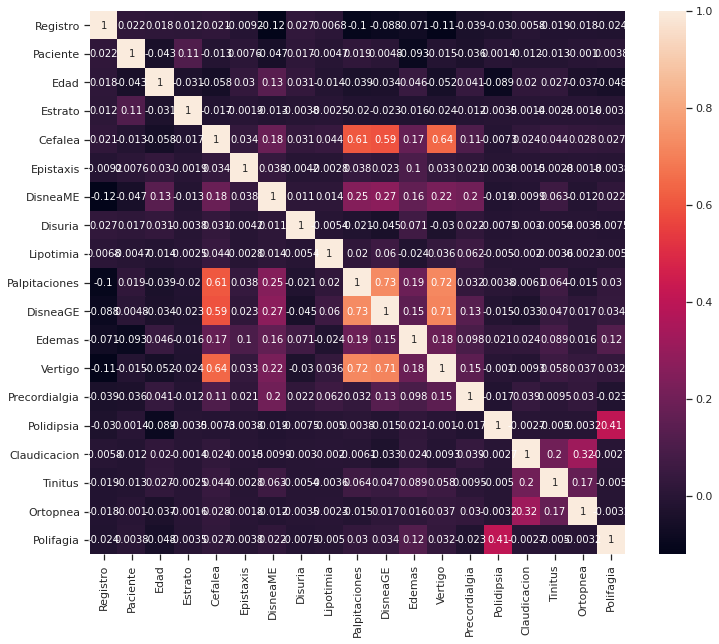

In [ ]:
sns.set(style="ticks", color_codes=True)
%matplotlib inline
plt.figure(figsize=(12, 10))
sns.heatmap(df_1.corr(),annot=True)

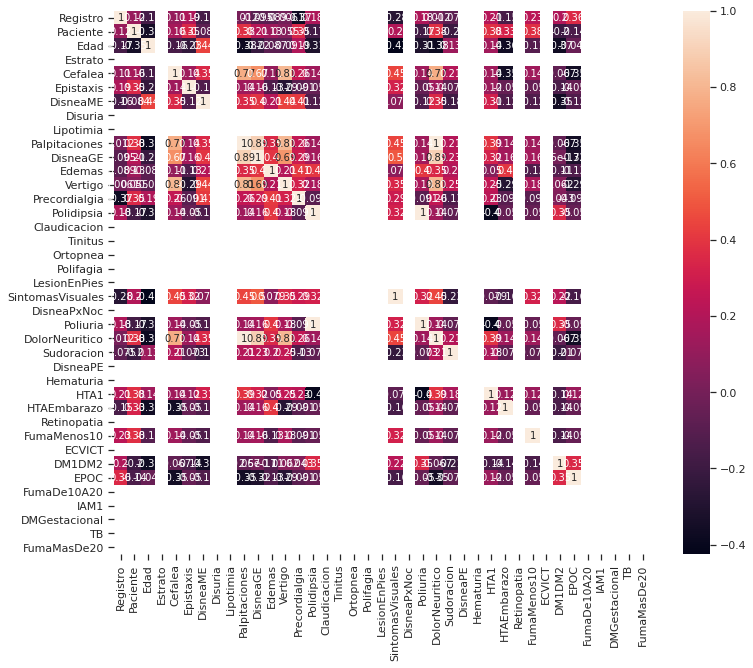

In [ ]:
sns.set(style="ticks", color_codes=True)
%matplotlib inline
plt.figure(figsize=(12, 10))
sns.heatmap(df_2.corr(),annot=True)

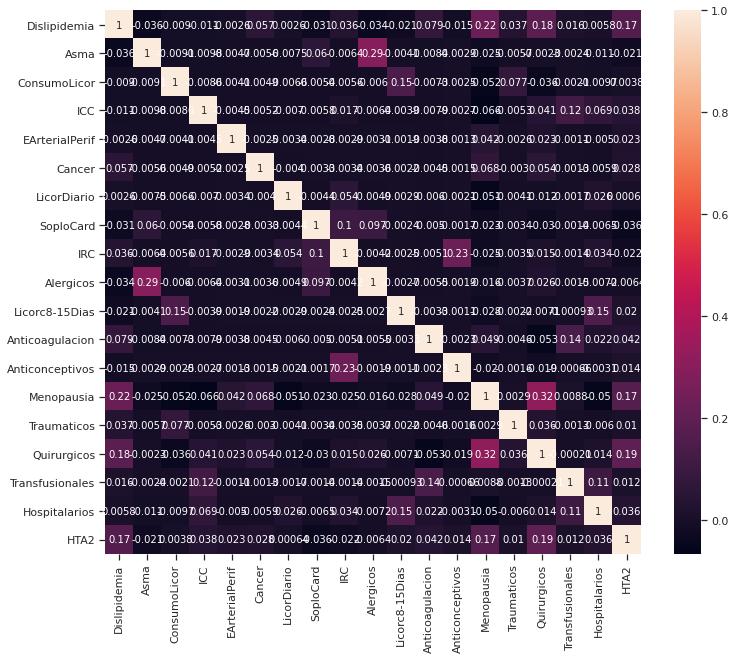

In [ ]:
sns.set(style="ticks", color_codes=True)
%matplotlib inline
plt.figure(figsize=(12, 10))
sns.heatmap(df_3.corr(),annot=True)

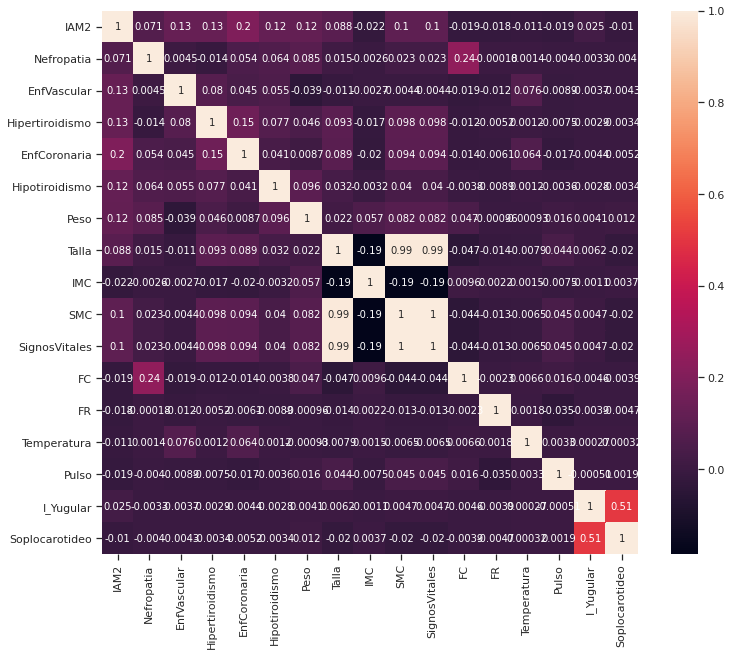

In [ ]:
sns.set(style="ticks", color_codes=True)
%matplotlib inline
plt.figure(figsize=(12, 10))
sns.heatmap(df_4.corr(),annot=True)

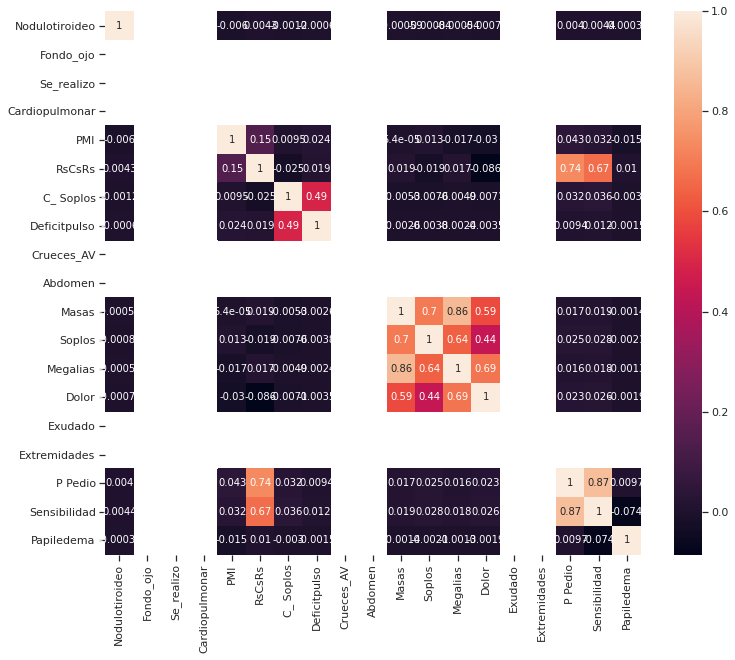

In [ ]:
sns.set(style="ticks", color_codes=True)
%matplotlib inline
plt.figure(figsize=(12, 10))
sns.heatmap(df_5.corr(),annot=True)

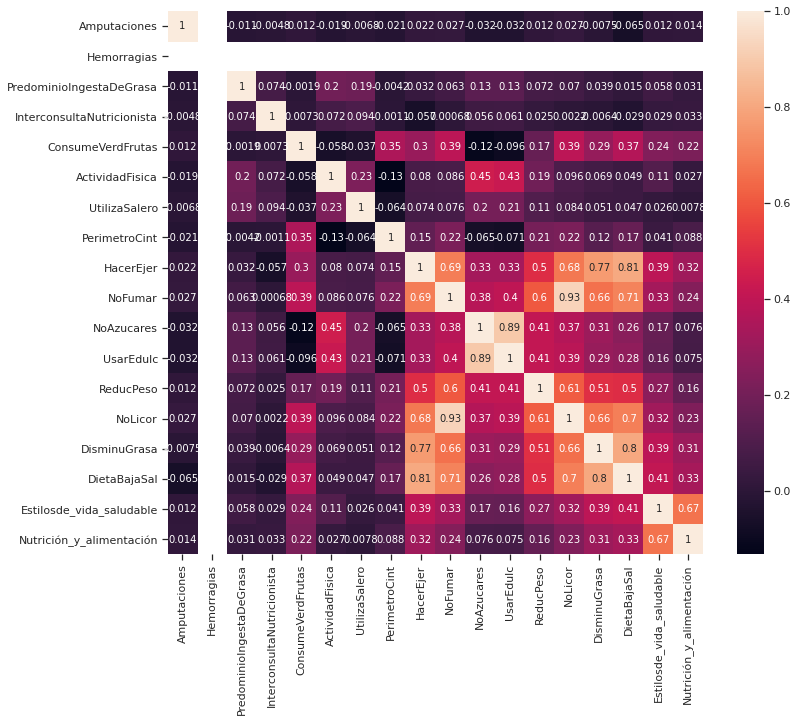

In [ ]:
sns.set(style="ticks", color_codes=True)
%matplotlib inline
plt.figure(figsize=(12, 10))
sns.heatmap(df_6.corr(),annot=True)

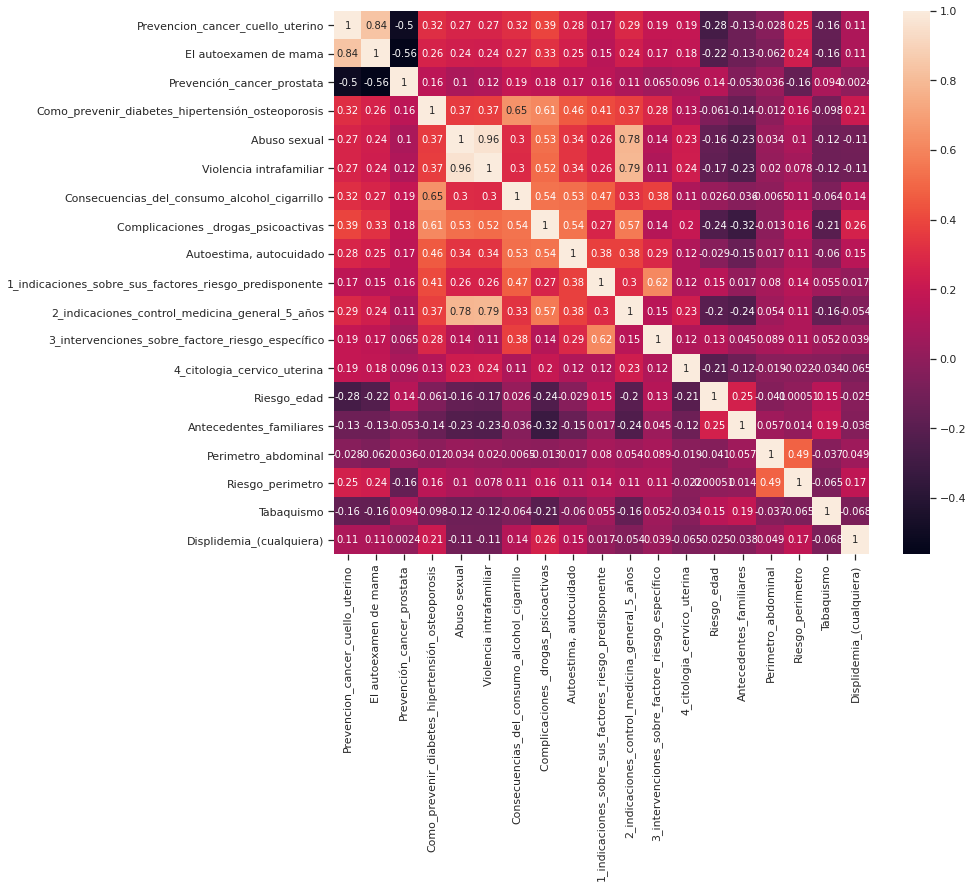

In [ ]:
sns.set(style="ticks", color_codes=True)
%matplotlib inline
plt.figure(figsize=(12, 10))
sns.heatmap(df_7.corr(),annot=True)

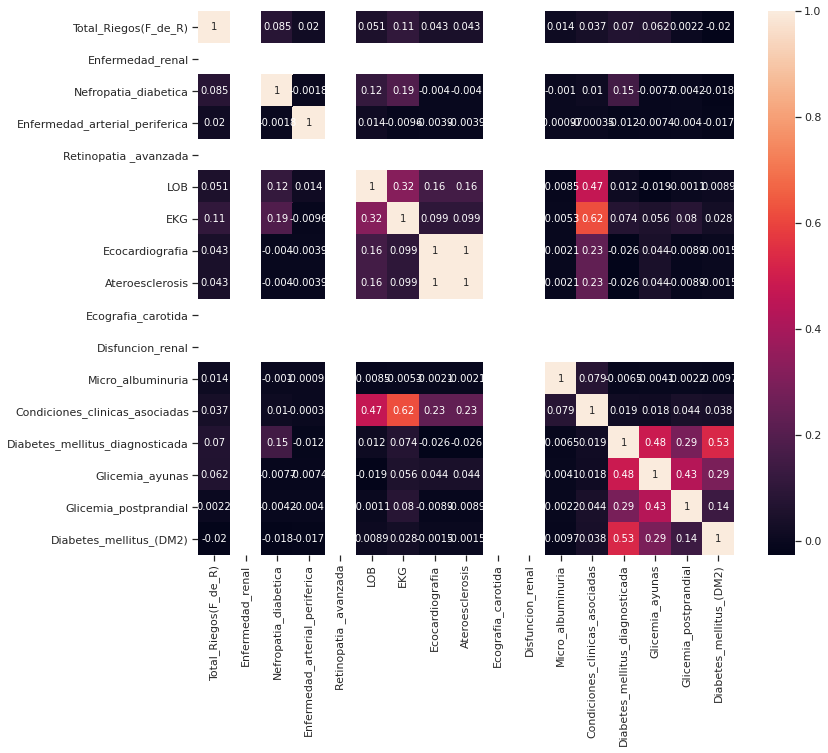

In [ ]:
sns.set(style="ticks", color_codes=True)
%matplotlib inline
plt.figure(figsize=(12, 10))
sns.heatmap(df_8.corr(),annot=True)

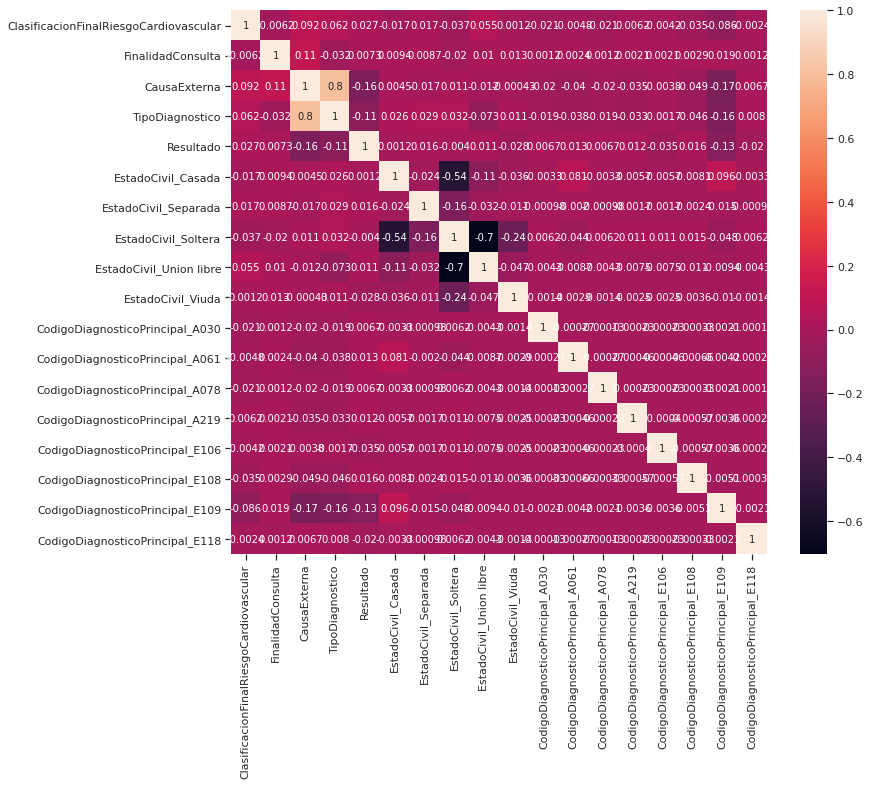

In [ ]:
sns.set(style="ticks", color_codes=True)
%matplotlib inline
plt.figure(figsize=(12, 10))
sns.heatmap(df_9.corr(),annot=True)

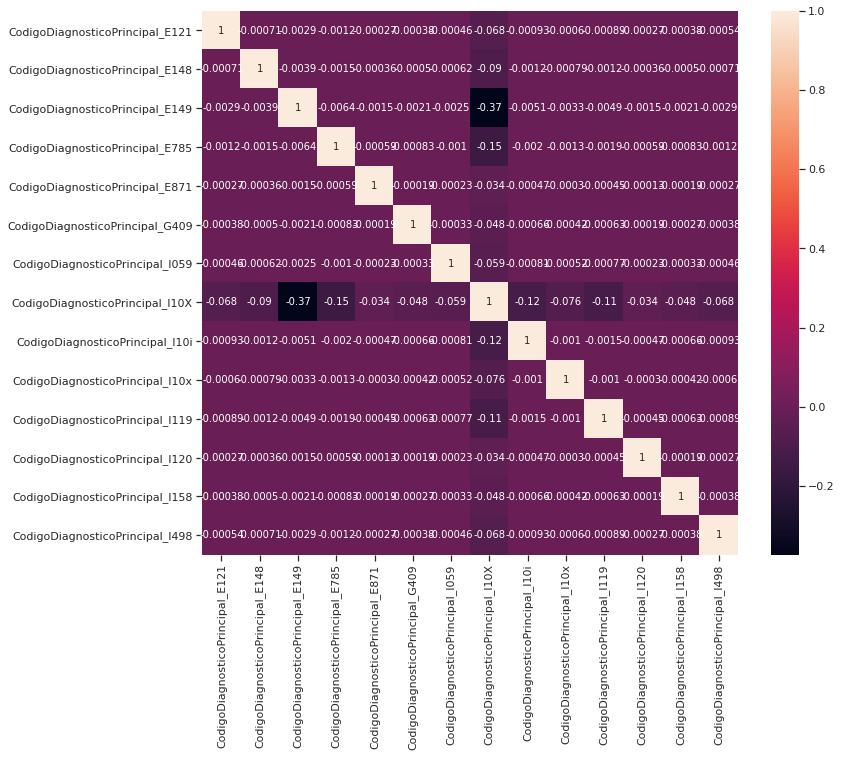

In [ ]:
sns.set(style="ticks", color_codes=True)
%matplotlib inline
plt.figure(figsize=(12, 10))
sns.heatmap(df_10.corr(),annot=True)

In [ ]:
#Feature selection, regresion logistica ) o 

#Eliminacion de variables con regresion variables 

#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html (validacion cruzada.....)

In [ ]:
#Dado que son muchas columnas es mas optimo realizar una  matriz de correlacion
# de serie de valores unidimensional y ordenada de menor a mayor corr.
correlation_mat = dataframe_dummies.corr ()
corr_pairs = correlation_mat.unstack ()
print (corr_pairs)
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs)

Registro                         Registro                           1.000000
                                 Paciente                           0.021858
                                 Edad                               0.017638
                                 Estrato                            0.011840
                                 Cefalea                            0.020587
                                                                      ...   
CodigoDiagnosticoPrincipal_Z000  CodigoDiagnosticoPrincipal_I120   -0.000520
                                 CodigoDiagnosticoPrincipal_I158   -0.000736
                                 CodigoDiagnosticoPrincipal_I498   -0.001040
                                 CodigoDiagnosticoPrincipal_L681   -0.000520
                                 CodigoDiagnosticoPrincipal_Z000    1.000000
Length: 35721, dtype: float64
PMI                              CausaExterna                          -0.849938
CausaExterna                     PMI      

In [ ]:
#Resumen de correlacion vs variable de respuesta ClasificacionFinalRiesgoCardiovascular
#%%html
#<iframe src="https://drive.google.com/file/d/1WB4h8zNlLJbD0GxH1Is1MGDIsbvJ5cX_/preview" width="640" height="220"></iframe>

Descartar variables aquellas con + bajas y/o negativas  correlacion.  > + ó - 0.4

In [ ]:
print('-----total de filas:',len(dataframe_filtrado['ClasificacionFinalRiesgoCardiovascular']))

-----total de filas: 7454


In [ ]:
#Feature selection, regresion logistica ) o 

#Eliminacion de variables con regresion variables 

#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html (validacion cruzada.....)

In [ ]:
#Dado que son muchas columnas es mas optimo realizar una  matriz de correlacion
# de serie de valores unidimensional y ordenada de menor a mayor corr.
correlation_mat = dataframe_dummies.corr ()
corr_pairs = correlation_mat.unstack ()
print (corr_pairs)
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs)

Registro                         Registro                           1.000000
                                 Paciente                           0.021858
                                 Edad                               0.017638
                                 Estrato                            0.011840
                                 Cefalea                            0.020587
                                                                      ...   
CodigoDiagnosticoPrincipal_Z000  CodigoDiagnosticoPrincipal_I120   -0.000520
                                 CodigoDiagnosticoPrincipal_I158   -0.000736
                                 CodigoDiagnosticoPrincipal_I498   -0.001040
                                 CodigoDiagnosticoPrincipal_L681   -0.000520
                                 CodigoDiagnosticoPrincipal_Z000    1.000000
Length: 35721, dtype: float64
PMI                              CausaExterna                          -0.849938
CausaExterna                     PMI      

In [ ]:
#Resumen de correlacion vs variable de respuesta ClasificacionFinalRiesgoCardiovascular
#%%html
#<iframe src="https://drive.google.com/file/d/1WB4h8zNlLJbD0GxH1Is1MGDIsbvJ5cX_/preview" width="640" height="220"></iframe>

Descartar variables aquellas con + bajas y/o negativas  correlacion.  > + ó - 0.4

In [ ]:
print('-----total de filas:',len(dataframe_filtrado['ClasificacionFinalRiesgoCardiovascular']))

-----total de filas: 7454


In [ ]:
for col in dataframe_dummies.columns:
    pct_missing = np.mean(dataframe_dummies[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Registro - 0%
Paciente - 0%
Edad - 0%
RSSS - 0%
Estrato - 0%
Cefalea - 0%
Epistaxis - 0%
DisneaME - 0%
Disuria - 0%
Lipotimia - 0%
Palpitaciones - 0%
DisneaGE - 0%
Edemas - 0%
Vertigo - 0%
Precordialgia - 0%
Polidipsia - 0%
Claudicacion - 0%
Tinitus - 0%
Ortopnea - 0%
Polifagia - 0%
LesionEnPies - 0%
SintomasVisuales - 0%
DisneaPxNoc - 0%
Poliuria - 0%
DolorNeuritico - 0%
Sudoracion - 0%
DisneaPE - 0%
Hematuria - 0%
HTA1 - 0%
HTAEmbarazo - 0%
Retinopatia - 0%
FumaMenos10 - 0%
ECVICT - 0%
DM1DM2 - 0%
EPOC - 0%
FumaDe10A20 - 0%
IAM1 - 0%
DMGestacional - 0%
TB - 0%
FumaMasDe20 - 0%
Angina - 0%
Dislipidemia - 0%
Asma - 0%
ConsumoLicor - 0%
ICC - 0%
EArterialPerif - 0%
Cancer - 0%
LicorDiario - 0%
SoploCard - 0%
IRC - 0%
Alergicos - 0%
Licorc8-15Dias - 0%
Anticoagulacion - 0%
Anticonceptivos - 0%
Menopausia - 0%
Traumaticos - 0%
Quirurgicos - 0%
Transfusionales - 0%
Hospitalarios - 0%
HTA2 - 0%
Obesidad - 0%
IAM2 - 0%
Nefropatia - 0%
EnfVascular - 0%
Hipertiroidismo - 0%
EnfCoronaria - 0%
H

#### **13. Selección de caracteristicas (Features selection)**

In [ ]:
dataframe_dummies.head()

,Registro,Paciente,Edad,RSSS,Estrato,Cefalea,Epistaxis,DisneaME,Disuria,Lipotimia,Palpitaciones,DisneaGE,Edemas,Vertigo,Precordialgia,Polidipsia,Claudicacion,Tinitus,Ortopnea,Polifagia,LesionEnPies,SintomasVisuales,DisneaPxNoc,Poliuria,DolorNeuritico,Sudoracion,DisneaPE,Hematuria,HTA1,HTAEmbarazo,Retinopatia,FumaMenos10,ECVICT,DM1DM2,EPOC,FumaDe10A20,IAM1,DMGestacional,TB,FumaMasDe20,...,Diabetes_mellitus_(DM2),PAS-PAD_T1,PAS-PAD_T2,PAS-PAD_P,ClasificacionFinalRiesgoCardiovascular,FinalidadConsulta,CausaExterna,TipoDiagnostico,DiagnosticoPrincipal,Resultado,EstadoCivil_Casada,EstadoCivil_Separada,EstadoCivil_Soltera,EstadoCivil_Union libre,EstadoCivil_Viuda,CodigoDiagnosticoPrincipal_A030,CodigoDiagnosticoPrincipal_A061,CodigoDiagnosticoPrincipal_A078,CodigoDiagnosticoPrincipal_A219,CodigoDiagnosticoPrincipal_E106,CodigoDiagnosticoPrincipal_E108,CodigoDiagnosticoPrincipal_E109,CodigoDiagnosticoPrincipal_E118,CodigoDiagnosticoPrincipal_E119,CodigoDiagnosticoPrincipal_E121,CodigoDiagnosticoPrincipal_E148,CodigoDiagnosticoPrincipal_E149,CodigoDiagnosticoPrincipal_E785,CodigoDiagnosticoPrincipal_E871,CodigoDiagnosticoPrincipal_G409,CodigoDiagnosticoPrincipal_I059,CodigoDiagnosticoPrincipal_I10X,CodigoDiagnosticoPrincipal_I10i,CodigoDiagnosticoPrincipal_I10x,CodigoDiagnosticoPrincipal_I119,CodigoDiagnosticoPrincipal_I120,CodigoDiagnosticoPrincipal_I158,CodigoDiagnosticoPrincipal_I498,CodigoDiagnosticoPrincipal_L681,CodigoDiagnosticoPrincipal_Z000
0,371520,102669,43,Subsidiado,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,...,0,120/80,120/80,120/80,3.0,10,15,3,HIPERTENSION ESENCIAL (PRIMARIA),True,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,376887,103957,46,Subsidiado,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,110/80,110/80,110/80,3.0,10,15,2,HIPERTENSION ESENCIAL (PRIMARIA),True,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,367522,104149,68,Subsidiado,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,1,130/80,130/80,130/80,3.0,10,15,2,HIPERTENSION ESENCIAL (PRIMARIA),True,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,376208,106031,53,No afiliado,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,120/80,120/80,120/80,3.0,10,15,2,HIPERTENSION ESENCIAL (PRIMARIA),True,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,375671,109902,88,Subsidiado,1,1,0,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,110/80,110/80,110/80,3.0,10,15,2,HIPERTENSION ESENCIAL (PRIMARIA),True,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
dataframe_dummies.shape

(7454, 197)

In [ ]:
#Rellenado de Dataframe de pacientes con datos faltantes por el metodo de interpolacion lineal con el fin de eliminar columnas
dataframe_dummies=dataframe_dummies.interpolate(method='linear')

#Rellenado de Dataframe de pacientes que quedaron con datos faltantes para aplicar metodo pad con el fin de eliminar columnas
dataframe_dummies=dataframe_dummies.fillna(method='pad')
dataframe_dummies = dataframe_dummies.dropna ()

In [ ]:
dataframe_dummies.shape

(7453, 197)

In [ ]:
#Eliminando las variables que no son optimas para el modelo
dataframe_dummies=dataframe_dummies.drop(['Paciente','P Pedio',
'Alergicos',
'Dislipidemia',
'ConsumoLicor',
'EstadoCivil_Separada',
'ReducPeso',
'Palpitaciones',
'DisneaME',
'EstadoCivil_Viuda',
'CodigoDiagnosticoPrincipal_E149',
'Disuria',
'Deficitpulso',
'Epistaxis',
'Claudicacion',
'Tinitus',
'ConsumeVerdFrutas',
'Estrato',
'Polifagia',
'DMGestacional',
'CodigoDiagnosticoPrincipal_E871',
'Polidipsia',
'Cancer',
'EstadoCivil_Soltera',
'DisneaPxNoc',
'Soplos',
'1_indicaciones_sobre_sus_factores_riesgo_predisponente',
'NoAzucares',
'CodigoDiagnosticoPrincipal_G409',
'Lipotimia',
'IRC',
'LesionEnPies',
'Obesidad',
'CodigoDiagnosticoPrincipal_I059',
'Anticonceptivos',
'Hematuria',
'LicorDiario',
'Poliuria',
'Papiledema',
'TB',
'Amputaciones',
'FumaMenos10',
'Hipertiroidismo',
'Úlceras',
'Ortopnea',
'EPOC',
'DisneaPE',
'Hemorragias',
'CodigoDiagnosticoPrincipal_E785',
'Prevencion_enfermedades_transmisión_sexual',
'Traumaticos',
'2_indicaciones_control_medicina_general_5_años',
'HTAEmbarazo',
'Anticoagulacion',
'PerimetroCint',
'HTA_ya_diagnosticada',
'Estilosde_vida_saludable',
'Transfusionales',
'Prevencion_cancer_cuello_uterino',
'Temperatura',
'Nutrición_y_alimentación',
'Micro_albuminuria',
'Complicaciones _drogas_psicoactivas',
'El autoexamen de mama',
'Como_prevenir_diabetes_hipertensión_osteoporosis',
'I_Yugular',
'Consecuencias_del_consumo_alcohol_cigarrillo',
'Glicemia_postprandial',
'IAM2',
'EnfVascular',
'4_citologia_cervico_uterina',
'Nefropatia',
'Soplocarotideo',
'CodigoDiagnosticoPrincipal_A078',
'C Masas',
'Displidemia_(cualquiera)',
'Retinopatia _avanzada',
'Nodulotiroideo',
'Enfermedad_arterial_periferica',
'Fondo_ojo',
'Enfermedad_renal',
'CodigoDiagnosticoPrincipal_E121',
'EArterialPerif',
'Se_realizo',
'CodigoDiagnosticoPrincipal_E148',
'Cardiopulmonar',
'CodigoDiagnosticoPrincipal_A030',
'CodigoDiagnosticoPrincipal_E119',
'CodigoDiagnosticoPrincipal_A061',
'CodigoDiagnosticoPrincipal_E106',
'CodigoDiagnosticoPrincipal_A219',
'CodigoDiagnosticoPrincipal_E118',
'CodigoDiagnosticoPrincipal_E109',
'CodigoDiagnosticoPrincipal_E108',
'Crueces_AV',
'CodigoDiagnosticoPrincipal_I10i',
'Abdomen',
'CodigoDiagnosticoPrincipal_I10x',
'Masas',
'CodigoDiagnosticoPrincipal_I119',
'CodigoDiagnosticoPrincipal_I158',
'CodigoDiagnosticoPrincipal_I498',
'Megalias',
'CodigoDiagnosticoPrincipal_L681',
'CodigoDiagnosticoPrincipal_Z000',
'CodigoDiagnosticoPrincipal_I10X',
'CodigoDiagnosticoPrincipal_I120',
'Extremidades',
'Exudado',
'EstadoCivil_Union libre',
'Estado_nutricional',
'HTA2',
'FumaDe10A20',
'Vertigo',
'ActividadFisica',
'NoLicor',
'IAM1',
'Angina',
'Sudoracion',
'Hospitalarios',
'FinalidadConsulta',
'Sensibilidad',
'PredominioIngestaDeGrasa',
'Retinopatia',
'HTA1',
'UsarEdulc',
'Dolor',
'C_ Soplos',
'Hipotiroidismo',
'UtilizaSalero',
'Menopausia',
'DisneaGE',
'DolorNeuritico',
'Asma',
'Reflejos',
'EstadoCivil_Casada',
'InterconsultaNutricionista',
'NoFumar',
'DisminuGrasa',
'HacerEjer',
'EnfCoronaria',
'SoploCard',
'Precordialgia',
'FumaMasDe20',
'SintomasVisuales','Registro'
],axis=1)

In [ ]:
dataframe_dummies.head()

,Edad,RSSS,Cefalea,Edemas,ECVICT,DM1DM2,ICC,Licorc8-15Dias,Quirurgicos,Peso,Talla,IMC,SMC,SignosVitales,FC,FR,Pulso,Tension_arterial,PMI,RsCsRs,DietaBajaSal,Prevención_cancer_prostata,Abuso sexual,Violencia intrafamiliar,"Autoestima, autocuidado",3_intervenciones_sobre_factore_riesgo_específico,Riesgo_edad,Antecedentes_familiares,Perimetro_abdominal,Riesgo_perimetro,Tabaquismo,Total_Riegos(F_de_R),Nefropatia_diabetica,LOB,EKG,Ecocardiografia,Ateroesclerosis,Ecografia_carotida,Disfuncion_renal,Condiciones_clinicas_asociadas,Diabetes_mellitus_diagnosticada,Glicemia_ayunas,Diabetes_mellitus_(DM2),PAS-PAD_T1,PAS-PAD_T2,PAS-PAD_P,ClasificacionFinalRiesgoCardiovascular,CausaExterna,TipoDiagnostico,DiagnosticoPrincipal,Resultado
1,46,Subsidiado,1,0,0,0,0,0,1,90.0,1.65,33.06,1.97,1.97,80.0,20.0,80.0,110/80,0,1,1,True,True,True,True,True,False,False,95.0,True,False,2.0,0,0,False,False,False,False,False,0,False,False,0,110/80,110/80,110/80,3.0,15,2,HIPERTENSION ESENCIAL (PRIMARIA),True
2,68,Subsidiado,1,0,0,1,0,0,0,90.0,1.70,31.14,2.01,2.01,88.0,22.0,88.0,130/80,0,1,1,True,True,True,True,True,True,False,112.0,True,False,4.0,0,0,False,False,False,False,False,0,True,False,1,130/80,130/80,130/80,3.0,15,2,HIPERTENSION ESENCIAL (PRIMARIA),True
3,53,No afiliado,1,0,0,0,0,0,1,65.0,1.55,27.06,1.64,1.64,88.0,22.0,88.0,120/80,0,1,1,False,True,True,True,True,False,False,88.0,True,False,2.0,0,0,False,False,False,False,False,0,False,False,0,120/80,120/80,120/80,3.0,15,2,HIPERTENSION ESENCIAL (PRIMARIA),True
4,88,Subsidiado,1,1,0,0,0,0,1,52.0,1.52,22.51,1.47,1.47,84.0,22.0,84.0,110/80,0,1,1,True,True,True,True,True,True,False,88.0,False,False,2.0,0,0,False,False,False,False,False,0,False,False,0,110/80,110/80,110/80,3.0,15,2,HIPERTENSION ESENCIAL (PRIMARIA),True
5,63,Subsidiado,1,0,0,0,0,0,1,70.0,1.61,27.01,1.74,1.74,84.0,22.0,84.0,130/80,0,1,1,True,True,True,True,True,True,True,97.0,False,True,4.0,0,0,False,False,False,False,False,0,False,False,0,130/80,130/80,130/80,3.0,15,2,HIPERTENSION ESENCIAL (PRIMARIA),True


In [ ]:
dataframe_dummies.shape

(7453, 51)

#### **14. Se exporta la data limpia**

In [ ]:
dataframe_dummies['CodigoDiagnosticoPrincipal']=dataframe['CodigoDiagnosticoPrincipal']

In [ ]:
#Se exporta los datos de la matriz a Drive
from google.colab import drive
drive.mount('drive')
dataframe_dummies.to_csv('clean_data.csv')
!cp clean_data.csv "/content/drive/MyDrive/Colab Notebooks/Parcial2_IA/DatosLimpios"


Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).
